<a href="https://colab.research.google.com/github/navodagunarathne/Diabete-prediction/blob/main/Diabete_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#diabetes_binary_health_indicators_BRFSS2015.csv

In [2]:
#1.Import the Data set
#2.Check for duplicates
#3.Checking data types and editing
#4.Divide the data set as TRAIN SET and TEST SET
#5.Missing value imputation
#6.Outlier detection
#7.Feature Engineering
#8.EDA
#9.Feature Scaling
#10.Encoding categorical variables
#11.Model Fitting (Without SMOTE)
#12.Model Evaluation (Without SMOTE)
#13.Addressing Class Imbalance with SMOTE
#14.Model Fitting (With SMOTE)
#15.Model Evaluation (With SMOTE)
#16.Hyperparameter Tuning (With and Without SMOTE)
#17.Model Fitting with Best Hyperparameters
#18.Final Model Evaluation

# 1.Import the Data set

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_binary_health_indicators_BRFSS2015.csv')

In [6]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
df.shape

(253680, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [11]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 253680, dtype: bool

In [12]:
df.duplicated().sum()

24206

In [13]:
df.duplicated(keep=False).sum()

35575

# Sample DataFrame

    'A': [1, 2, 2, 3, 4, 4, 4, 5]

    'B': [5, 6, 6, 7, 8, 8, 8, 9]

In the above DataFrame

The row (2, 6) appears first at index 1. it is the first occurence
The second occurrence of this row at index 2 is considered a duplicate.
The row (4, 8) appears first at index 4. The subsequent occurrences of this row at indices 5 and 6 are considered duplicates.



# Differences Between df.duplicated(keep=False).sum() and df.duplicated().sum()

1. df.duplicated(keep=False).sum()

Purpose:
Counts all instances of duplicates, including the first occurrence of each duplicate row.

Explanation: The keep=False parameter marks all duplicates as True, including the first instance of the duplicate rows. Summing this boolean Series counts every instance of the duplicate rows.

Usage: This is useful when you want to know the total number of duplicate rows, including all occurrences.


2. df.duplicated().sum()

Purpose: Counts only subsequent duplicates, excluding the first occurrence of each duplicate row.

Explanation: The default keep='first' parameter marks only subsequent occurrences of duplicate rows as True, while the first occurrence is marked as False. Summing this boolean Series counts only the subsequent duplicates.

Usage: This is useful when you want to know how many rows are duplicates, without counting the first occurrence.



In [14]:
# Count all instances of duplicates(including first occurence)
sum_duplicates_keep_false = df.duplicated(keep=False).sum()
print(f"Total duplicates identified (keep=False): {sum_duplicates_keep_false}")


Total duplicates identified (keep=False): 35575


In [15]:
# Count only subsequent duplicates(except first occurence)
sum_duplicates_keep_first = df.duplicated().sum()
print(f"Total duplicates identified (keep='first'): {sum_duplicates_keep_first}")


Total duplicates identified (keep='first'): 24206


In [16]:
#Remove all instances of duplicates(including first occurence;delete all records)

#df_cleaned_all = df[~df.duplicated(keep=False)]

#print("DataFrame after removing all instances of duplicates:")
#print(df_cleaned_all)


In [17]:
# Remove only subsequent duplicates, keep the first occurrence
df_cleaned_first = df.drop_duplicates()

print("DataFrame after removing subsequent duplicates, keeping the first occurrence:")
print(df_cleaned_first)

#this method of removal of duplicates is applied here

DataFrame after removing subsequent duplicates, keeping the first occurrence:
        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0

In [18]:
df.shape

(253680, 22)

In [19]:
df_cleaned_first.shape

(229474, 22)

In [20]:
# Rename the DataFrame
data = df_cleaned_first

# Now `data` contains the DataFrame without duplicates



# 3.Checking data types and editing(Preprocessing)

In [21]:
data.dtypes


Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

# 4.Divide the data set as TRAIN SET and TEST SET



In [22]:
#First we have to devide the data set in to Features(predictor variables) and Label(target variable/response variable)

from sklearn.model_selection import train_test_split

# target variable (y) ='Diabetes_binary'
# features (X) = all other variables except Diabetes_binary


X = data.drop(columns=['Diabetes_binary'])  # Features
y = data['Diabetes_binary']  # Target variable


In [23]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training set (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

# Now, X_train and y_train contain the training set, and X_test and y_test contain the test set


In [24]:
# Assuming data, X_train, y_train, X_test, and y_test are already defined
# For the purpose of this example, let's recreate X_train and y_train from the original data

data = pd.DataFrame(data)
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Merge X_train and y_train for easier analysis
train_data = pd.concat([X_train, y_train], axis=1)


In [25]:
# here gives the no:of rows that each data set includes and no: of columns that include
# N.B no:of variables =11 ( except response variable)


X_train.shape, X_test.shape

((160631, 21), (68843, 21))

# 5.Missing value imputation

In [26]:
data.isnull().sum()


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [27]:
# Checking for missing values in the training set
print("Missing values in training set:")
print(X_train.isnull().sum())

Missing values in training set:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [28]:
# Checking for missing values in the testing set
print("Missing values in testing set:")
print(X_test.isnull().sum())

Missing values in testing set:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


# 6.Outlier Detection

Number of outliers in Diabetes_binary: 0
Outliers in Diabetes_binary:
Series([], Name: Diabetes_binary, dtype: float64)


Text(0, 0.5, 'Diabetes_binary')

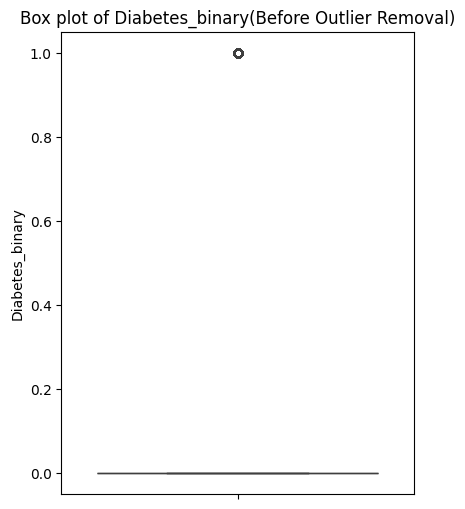

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate z-scores for 'selling_price' in the training set
Diabetes_binary_mean = np.mean(y_train)
Diabetes_binary_std = np.std(y_train)
Diabetes_binary_zscore = (y_train - Diabetes_binary_mean) / Diabetes_binary_std

# Define threshold for outliers
threshold = 3

# Identify outliers in the training set
outliers = y_train[np.abs(Diabetes_binary_zscore) > threshold]

# Print the number of outliers
print("Number of outliers in Diabetes_binary:", len(outliers))

# Print the outliers
print("Outliers in Diabetes_binary:")
print(outliers)

# Box plot of 'Diabetes_binary' with outliers highlighted
plt.figure(figsize=(10, 6))

# Box plot of 'Diabetes_binary'
plt.subplot(1, 2, 1)
sns.boxplot(y=y_train)
plt.title('Box plot of Diabetes_binary(Before Outlier Removal)')
plt.ylabel('Diabetes_binary')



In [30]:
import numpy as np
import pandas as pd

# Assuming X_train is your DataFrame containing the training data

# Define the quantitative predictor variables
quantitative_vars = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
    'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]

# Define function to calculate Mahalanobis distance
def mahalanobis_dist(X, mean, cov_inv):
    X_minus_mean = X - mean
    dist = np.sqrt(np.dot(np.dot(X_minus_mean, cov_inv), X_minus_mean.T))
    return dist

# Calculate the covariance matrix
cov_matrix = np.cov(X_train[quantitative_vars], rowvar=False)

# Calculate the inverse of the covariance matrix
cov_inv = np.linalg.inv(cov_matrix)

# Calculate the mean of each variable
var_means = np.mean(X_train[quantitative_vars], axis=0)

# Calculate Mahalanobis distance for each data point in the training set
distances = []
for index, row in X_train[quantitative_vars].iterrows():
    dist = mahalanobis_dist(row.values, var_means, cov_inv)
    distances.append(dist)

# Convert distances list to a numpy array
distances = np.array(distances)

# Define threshold for outliers
threshold = np.mean(distances) + 3 * np.std(distances)

# Identify outliers
outliers_indices = np.where(distances > threshold)[0]
outliers = X_train.iloc[outliers_indices]

# Print the number of outliers
print("Number of multivariate outliers in quantitative predictor variables:", len(outliers))

# Print the indices of outliers
print("Indices of multivariate outliers:")
print(outliers_indices)

# Print the outliers
print("Multivariate outliers in quantitative predictor variables:")
print(outliers)


Number of multivariate outliers in quantitative predictor variables: 764
Indices of multivariate outliers:
[   429    681    684    734    793   1030   1196   1213   2119   2494
   2714   2817   2992   3247   3533   3799   3938   4070   4182   4236
   4289   4366   4438   4594   4625   4917   5078   5232   5366   5464
   5806   6078   6180   6187   6284   6871   7866   7924   7972   7985
   8314   8356   8370   8380   8463   8534   8658   8871   8889   9336
   9384   9434   9498   9730  10234  10251  10267  10414  10842  10942
  11363  11432  11988  11989  12111  12156  12382  12539  12689  12768
  12939  13430  13752  13857  14000  14342  14563  14771  15172  15180
  15184  15269  15870  16212  16432  16900  16904  17691  17791  17965
  18275  18503  18613  18764  19290  19948  19987  20257  20341  20866
  20906  21064  21187  21347  21983  22101  22624  22738  22746  22773
  22946  23030  23203  23231  23425  23560  23607  23643  24283  24637
  24778  24875  25083  25296  25698  2584

# 7.Exploratory Data Analyis

In [31]:
#1.Diabetes_binary  0 = no diabetes  1 = diabetes

#2.HighBP   0 = no high BP 1 = high BP

#3.HighChol   0 = no high cholesterol 1 = high cholesterol

#4.CholCheck   0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

#5.BMI       Body Mass Index

#6.Smoker   Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

#7.Stroke         Ever told) you had a stroke. 0 = no 1 = yes

#8.HeartDiseaseorAttack  coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

#9.PhysActivity         physical activity in past 30 days - not including job 0 = no 1 = yes

#10.Fruits          Consume Fruit 1 or more times per day 0 = no 1 = yes

#11.Veggies         Consume Vegetables 1 or more times per day 0 = no 1 = yes

#12.HvyAlcoholConsump   Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per

#13.AnyHealthcare     Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

#14.NoDocbcCost        Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

#15.GenHlth        Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

#16.MentHlth          Now thinking about your mental health, which includes stress, depression, and problems with emotions,

#17.PhysHlth        Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

#18.DiffWalk             Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

#19.Sex                    0 = female 1 = male

#20.Age                     13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

#21.Education             Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades

#22.Income          Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more




In [32]:
# Categorical variables - Diabetes_binary / HighBP / HighChol / CholCheck / Smoker   / Stroke / HeartDiseaseorAttack
    #                       PhysActivity / Fruits / Veggies / HvyAlcoholConsump / AnyHealthcare / NoDocbcCost
    #                      GenHlth / DiffWalk / Sex / Age / Education  / Income

# Quantitative variables -BMI / MentHlth / PhysHlth ( since the MentHlth and PhysHlth are categorical coded, but it has 30 classes...
#                                                     if the no: of classes so high, then it can be classfied as numerical)


# *GRAPHICAL ANALYSIS*

# i.)Univariate analyis of Response variable(y)

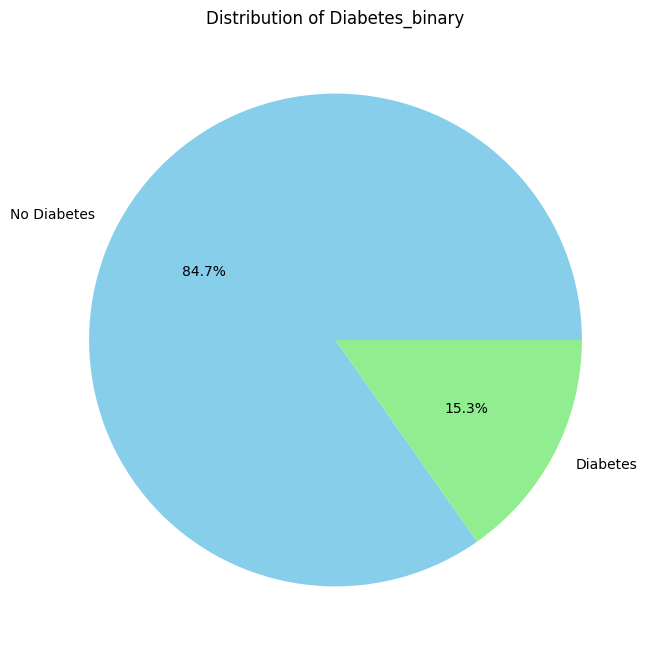

<ipython-input-33-0c513e817225>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette=['blue', 'red'])


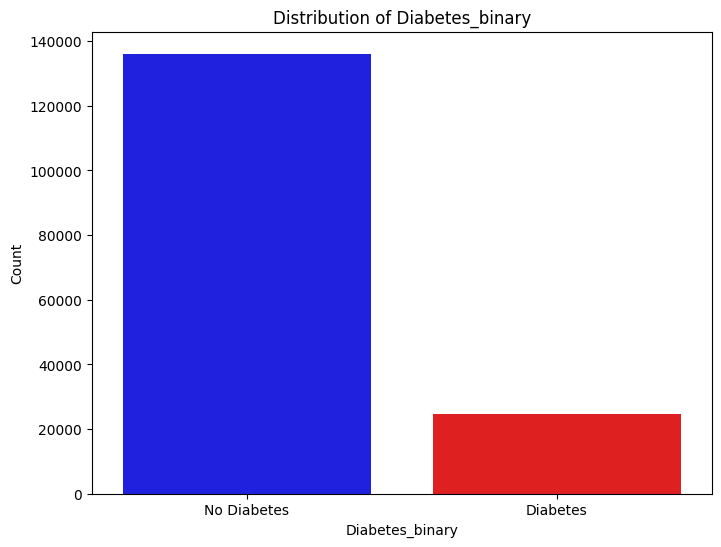

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



# Pie chart for the distribution of Diabetes_binary for y_train
plt.figure(figsize=(8, 8))
y_train.value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], labels=['No Diabetes', 'Diabetes'])
plt.title('Distribution of Diabetes_binary')
plt.ylabel('')
plt.show()

# Bar chart for the distribution of Diabetes_binary for y_train
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette=['blue', 'red'])
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()


# ii.)Bi-variate Analysis

Since our Response variable (Diabetes_binary ) is categorical variable,

Boxplots for each and every quantitative predictor variables Vs categorical response variable
Two way tables for each and every categorical predictor variables with categorical response variable

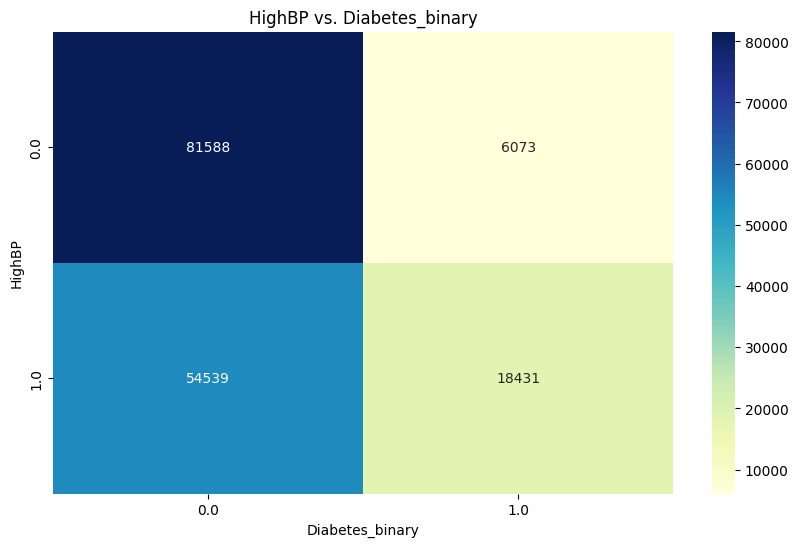

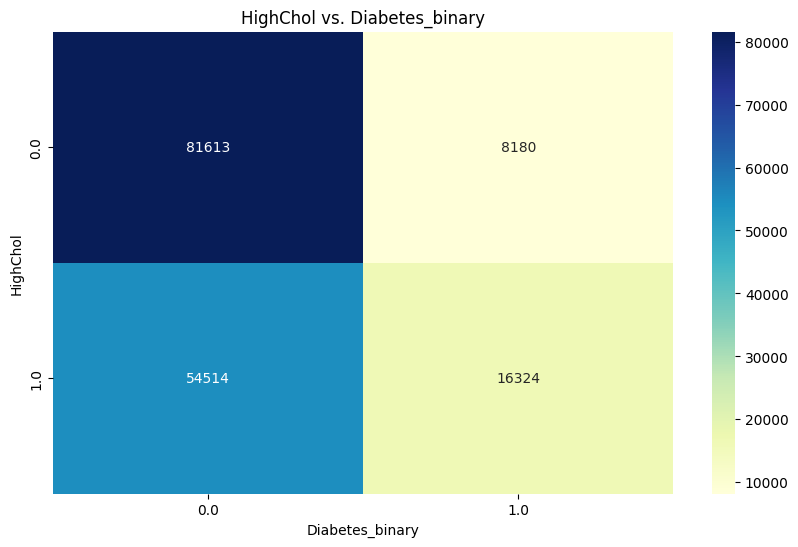

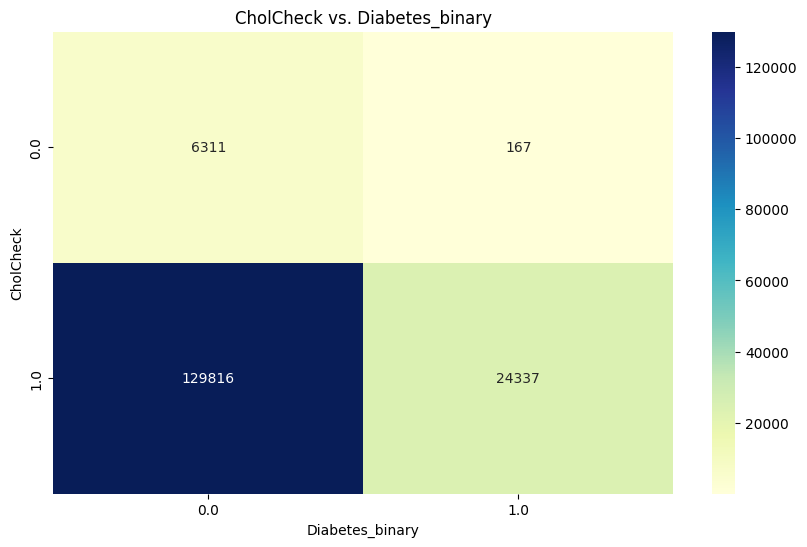

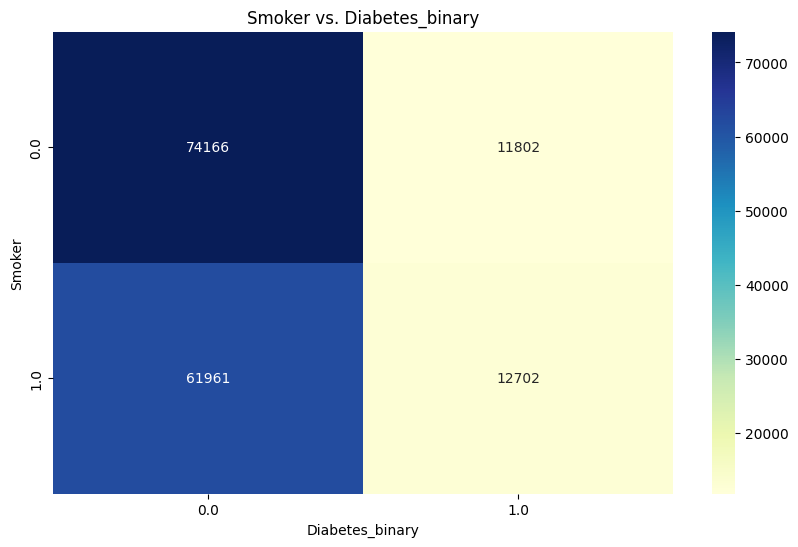

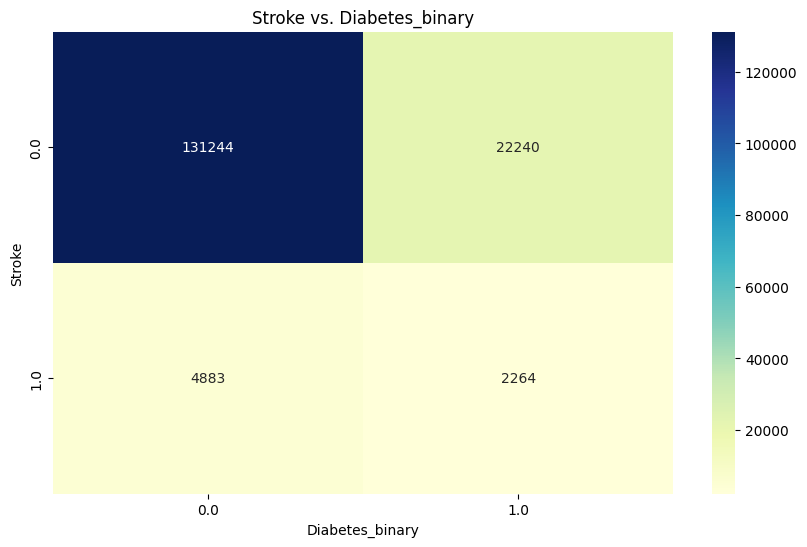

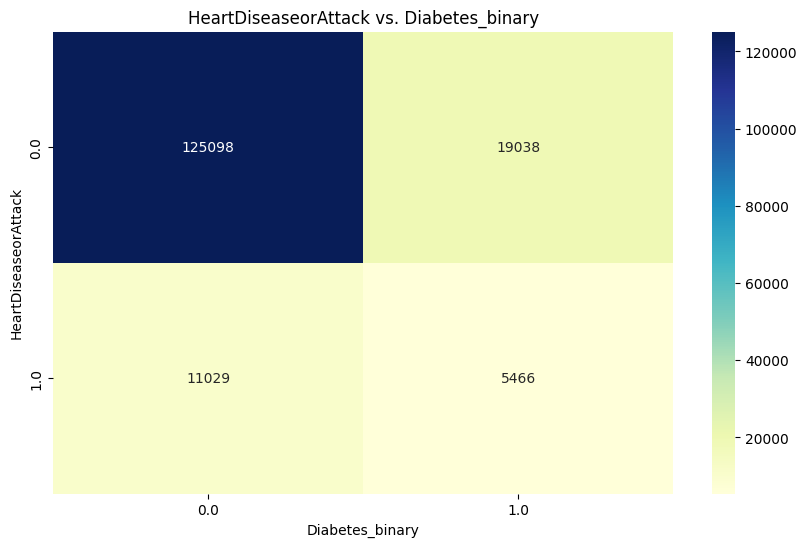

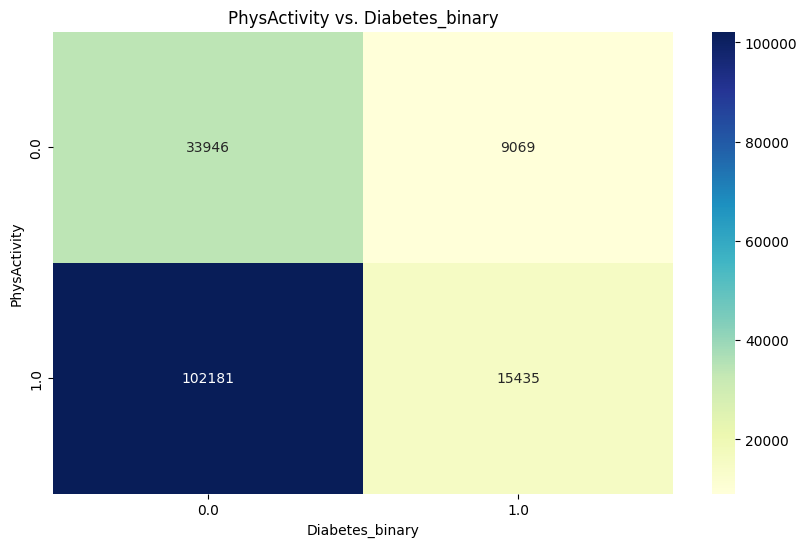

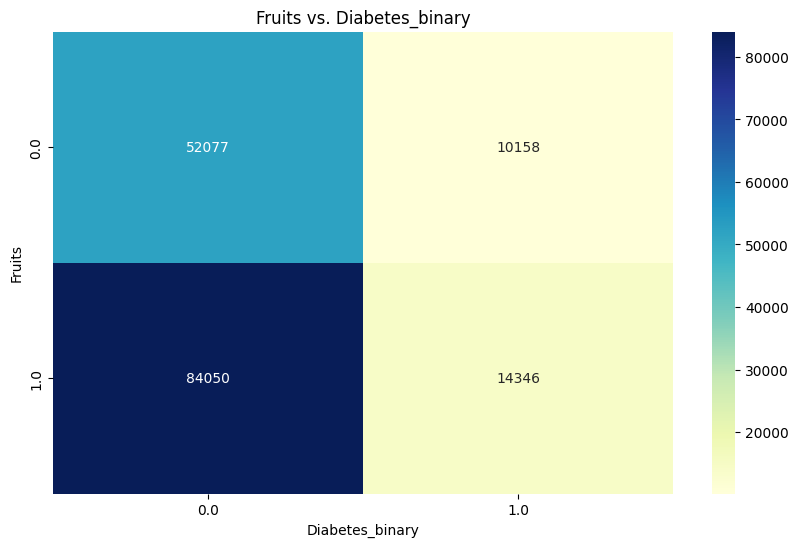

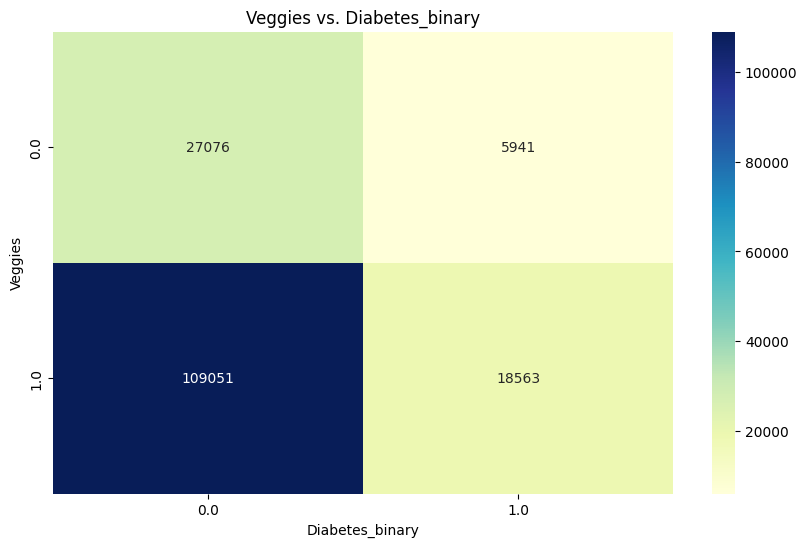

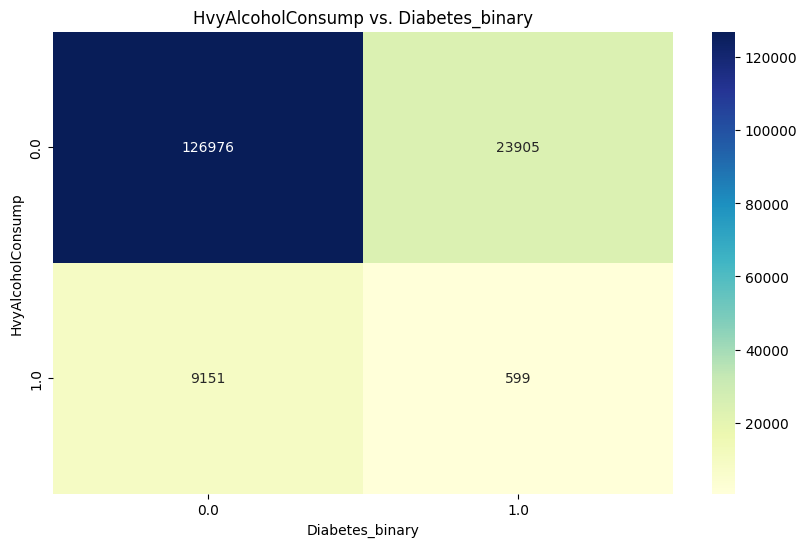

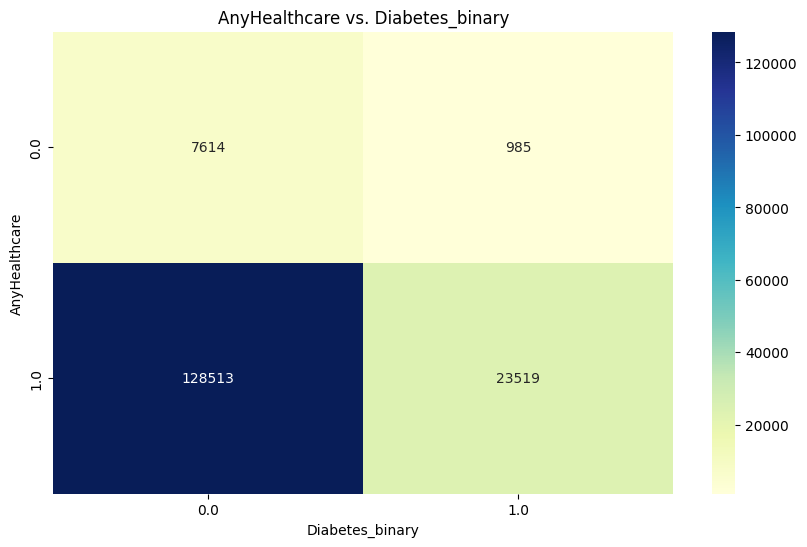

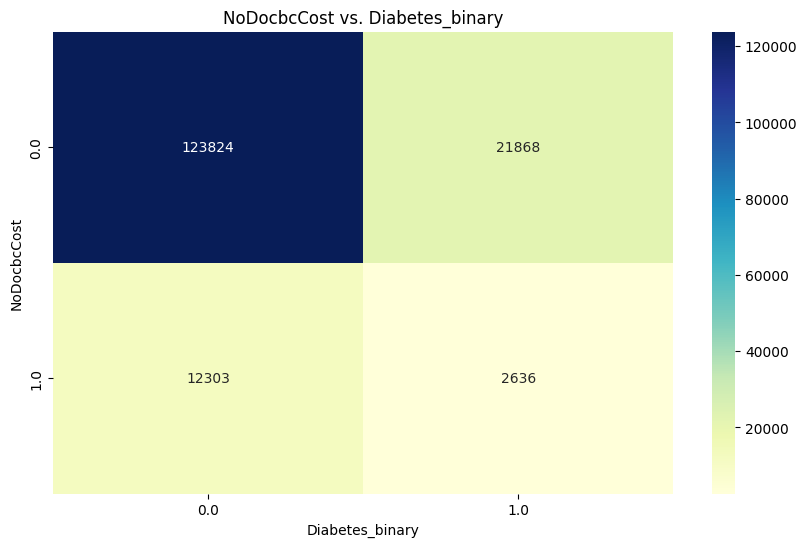

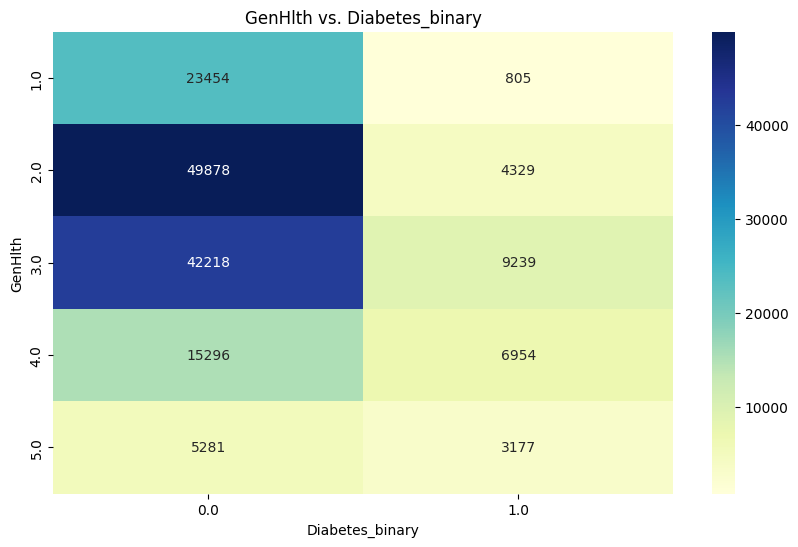

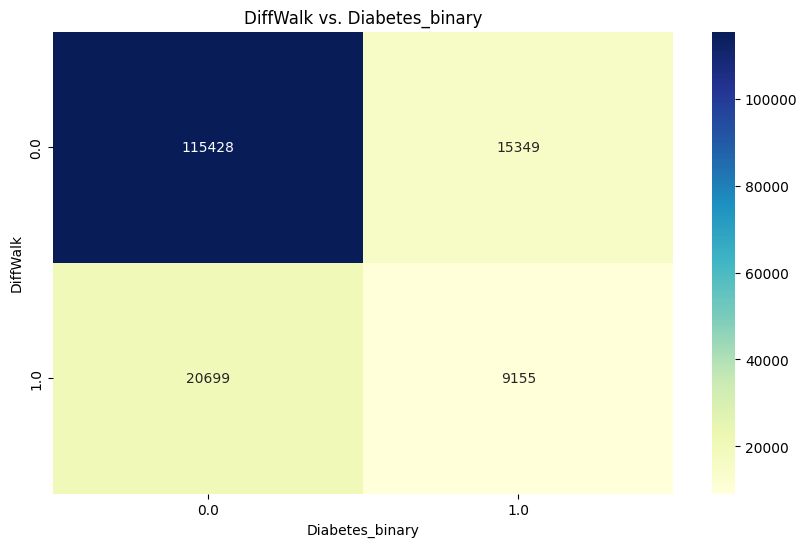

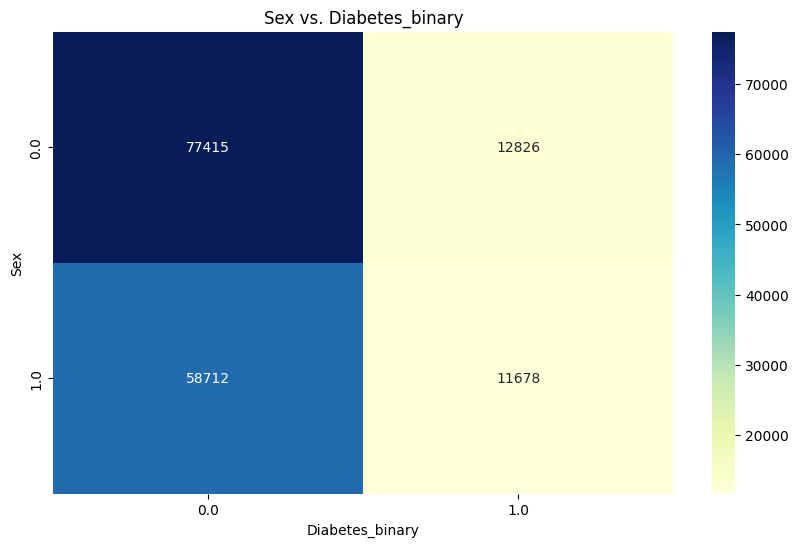

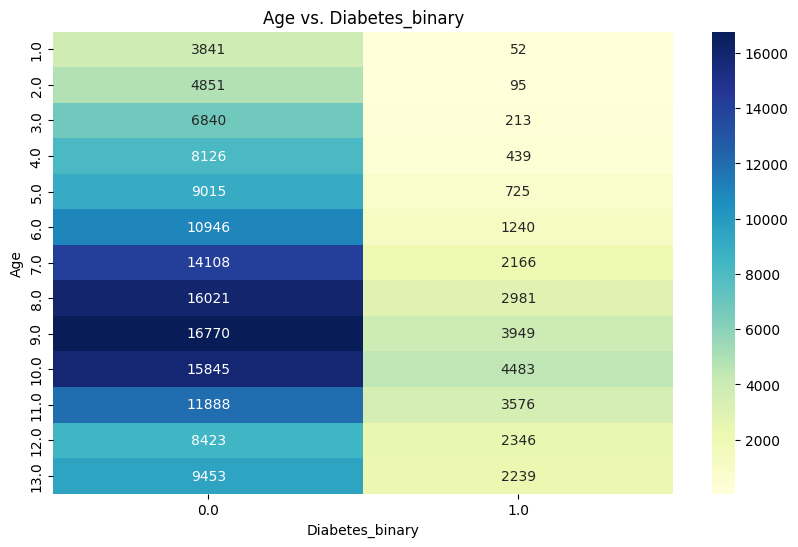

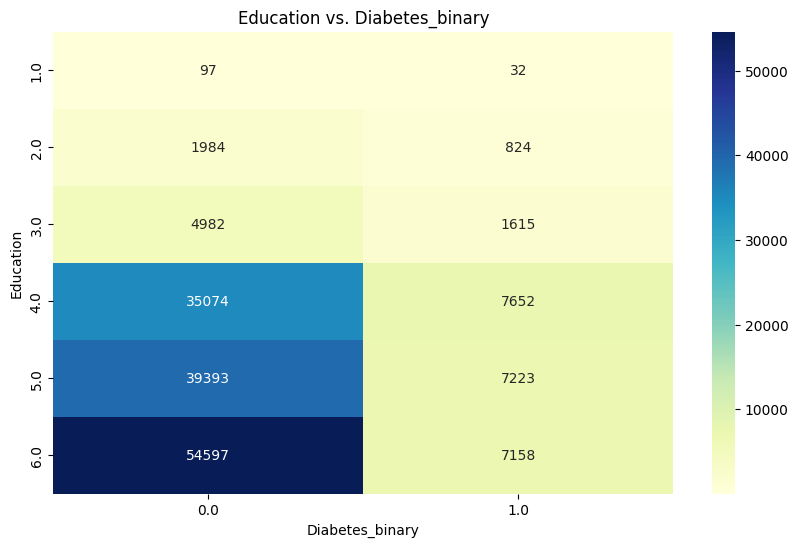

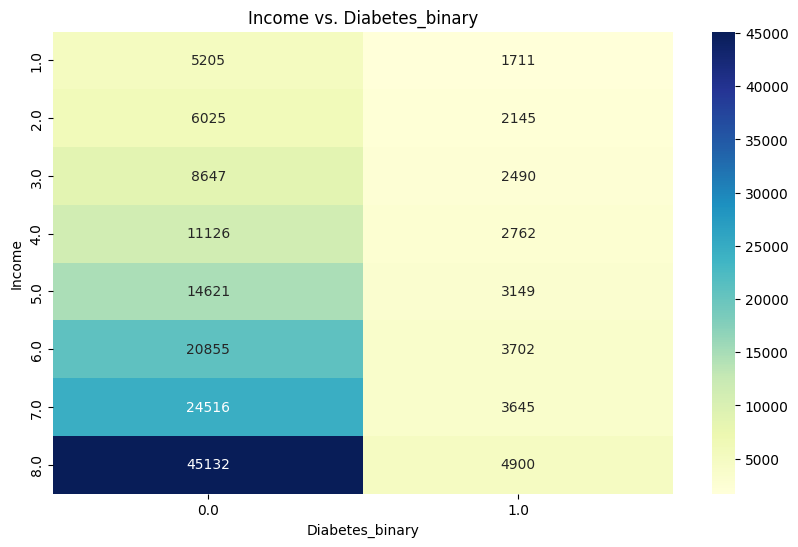

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define categorical predictors and response variable
categorical_predictors = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
    'DiffWalk', 'Sex', 'Age', 'Education', 'Income'
]
response_variable = 'Diabetes_binary'

# Create two-way tables and visualize using heatmaps
for predictor in categorical_predictors:
    contingency_table = pd.crosstab(train_data[predictor], train_data[response_variable])
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'{predictor} vs. {response_variable}')
    plt.xlabel(response_variable)
    plt.ylabel(predictor)
    plt.show()


<ipython-input-35-77e2b4f704cb>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_binary', y=var, data=train_data, palette=['skyblue', 'lightgreen'])


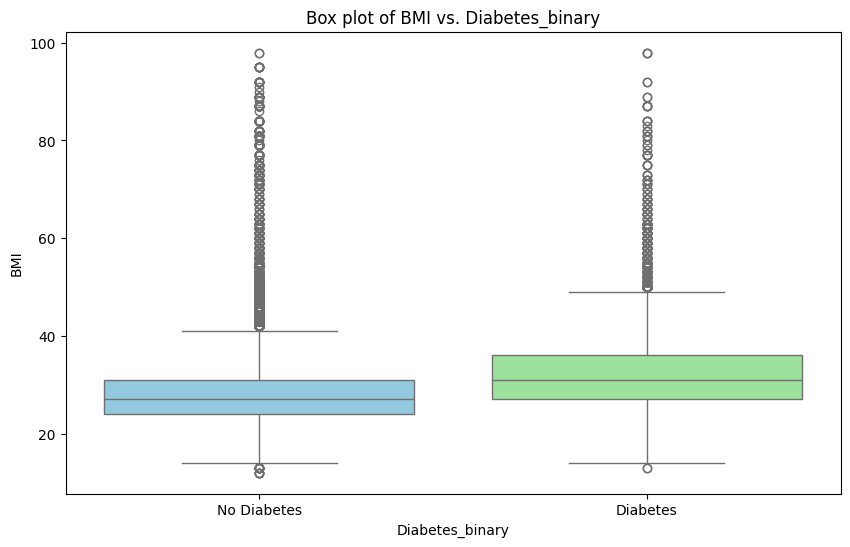

<ipython-input-35-77e2b4f704cb>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_binary', y=var, data=train_data, palette=['skyblue', 'lightgreen'])


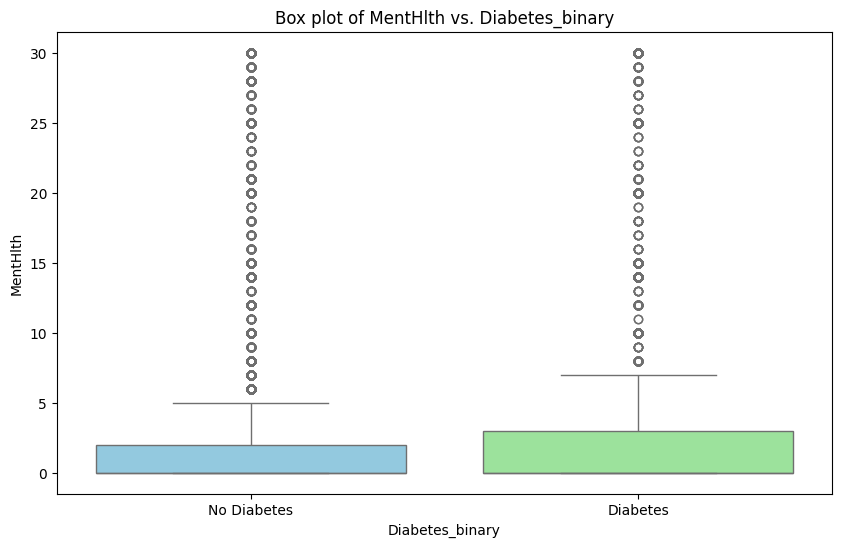

<ipython-input-35-77e2b4f704cb>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_binary', y=var, data=train_data, palette=['skyblue', 'lightgreen'])


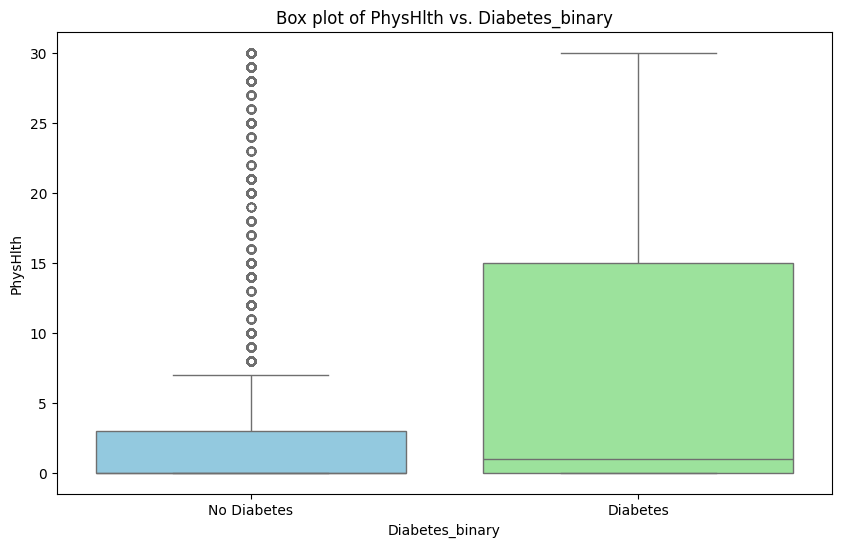

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assuming you have already split the data into X_train, y_train, X_test, and y_test

# Combine X_train and y_train for plotting purposes
train_data = X_train.copy()
train_data['Diabetes_binary'] = y_train

# Define quantitative variables
quantitative_vars = ['BMI', 'MentHlth', 'PhysHlth']

# Create box plots for each quantitative variable vs. Diabetes_binary
for var in quantitative_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Diabetes_binary', y=var, data=train_data, palette=['skyblue', 'lightgreen'])
    plt.title(f'Box plot of {var} vs. Diabetes_binary')
    plt.xlabel('Diabetes_binary')
    plt.ylabel(var)
    plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
    plt.show()


# *NUMERICAL ANALYSIS*

Certainly! Here's a comprehensive explanation of the Chi-square test, including its steps, underlying theory, and criteria for rejection:

### Chi-square Test: Overview

The Chi-square (χ²) test is a statistical method used to determine if there is a significant association between two categorical variables. It is commonly used to analyze contingency tables, which display the frequency distribution of categorical variables.

### Steps in Chi-square Test

1. **Formulate Hypotheses**:
   - **Null Hypothesis (H₀)**: There is no association between the two categorical variables.
   - **Alternative Hypothesis (H₁)**: There is an association between the two categorical variables.

2. **Construct Contingency Table**:
   - Construct a contingency table (also known as a cross-tabulation or crosstab) that summarizes the joint distribution of the categorical variables. The table shows the frequency counts for each combination of categories.

3. **Calculate Expected Frequencies**:
   - Compute the expected frequencies under the assumption that the null hypothesis is true. These expected frequencies are based on the marginal totals of the contingency table and the assumption of independence between the variables.

4. **Compute Chi-square Statistic**:
   - Calculate the Chi-square statistic using the formula:
     \[
     \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
     \]
     where:
     - \( O_i \) is the observed frequency in cell \( i \) of the contingency table.
     - \( E_i \) is the expected frequency in cell \( i \) under the null hypothesis.

5. **Determine Degrees of Freedom**:
   - Degrees of freedom (df) are calculated as \( (r-1)(c-1) \), where \( r \) is the number of rows and \( c \) is the number of columns in the contingency table.

6. **Compare with Critical Value**:
   - Determine the critical value of Chi-square from the Chi-square distribution table (or use statistical software). This value depends on the chosen significance level (usually 0.05) and the degrees of freedom.

7. **Conclusion**:
   - Compare the computed Chi-square statistic with the critical value:
     - If \( \chi^2 \) > Critical value, reject the null hypothesis (significant association).
     - If \( \chi^2 \) ≤ Critical value, do not reject the null hypothesis (no significant association).

### Theoretical Basis

- **Independence Assumption**: The Chi-square test assumes that the variables are independent under the null hypothesis. This means that the observed frequencies in the contingency table should not differ significantly from the expected frequencies if there is no association between the variables.

- **Chi-square Distribution**: The Chi-square statistic follows a Chi-square distribution. The shape of this distribution depends on the degrees of freedom.

### Rejection Criteria

- **Significance Level (\( \alpha \))**: Typically set at 0.05, it represents the probability of rejecting the null hypothesis when it is actually true. This is the threshold for deciding whether to reject the null hypothesis.

- **Critical Value**: Determined from the Chi-square distribution table or using statistical software based on the chosen significance level and degrees of freedom.

- **Decision**:
  - If the computed Chi-square statistic is greater than the critical value, there is sufficient evidence to reject the null hypothesis and conclude that there is a significant association between the variables.
  - If the computed Chi-square statistic is less than or equal to the critical value, there is insufficient evidence to reject the null hypothesis, indicating no significant association.

### Example Interpretation

Suppose we perform a Chi-square test to determine if there is an association between `Smoker` (Yes/No) and `Diabetes_binary` (Yes/No). After computation, we find \( \chi^2 = 10.24 \) with 1 degree of freedom. At \( \alpha = 0.05 \), the critical value from the Chi-square table for 1 degree of freedom is approximately 3.84.

Since \( \chi^2 > 3.84 \), we reject the null hypothesis. Therefore, we conclude that there is a significant association between being a smoker and having diabetes.

### Conclusion

The Chi-square test is a powerful tool for analyzing categorical data and determining if there is a significant relationship between variables. By following these steps and understanding the theoretical basis and rejection criteria, you can confidently interpret the results of Chi-square tests in your analyses.

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from scipy.stats import chi2


# Define categorical variables
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                    'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Perform Chi-square tests
chi2_results = []

for var in categorical_vars:
    contingency_table = pd.crosstab(train_data[var], train_data['Diabetes_binary'])
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    critical_val = chi2.ppf(0.95, dof)  # 0.95 significance level for chi-square distribution
    result = 'Reject H0' if chi2_stat > critical_val else 'Accept H0'
    chi2_results.append({
        'Variable': var,
        'Chi2': chi2_stat,
        'p-value': p_val,
        'Degrees of Freedom': dof,
        'Critical Value': critical_val,
        'Conclusion': result
    })

# Convert results to DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Print the results
print(chi2_df)

# Final conclusion based on p-values
for index, row in chi2_df.iterrows():
    print(f"Variable: {row['Variable']}")
    print(f"  Chi2 Statistic: {row['Chi2']:.4f}")
    print(f"  p-value: {row['p-value']:.4f}")
    print(f"  Degrees of Freedom: {row['Degrees of Freedom']}")
    print(f"  Critical Value: {row['Critical Value']:.4f}")
    print(f"  Conclusion: {row['Conclusion']}")
    if row['p-value'] < 0.05:
        print(f"  -> There is a significant association between {row['Variable']} and Diabetes_binary.")
    else:
        print(f"  -> There is no significant association between {row['Variable']} and Diabetes_binary.")
    print("\n")


                Variable          Chi2        p-value  Degrees of Freedom  \
0                 HighBP  10348.753669   0.000000e+00                   1   
1               HighChol   5946.311964   0.000000e+00                   1   
2              CholCheck    838.092048  2.820991e-184                   1   
3                 Smoker    333.109043   2.021357e-74                   1   
4                 Stroke   1559.161859   0.000000e+00                   1   
5   HeartDiseaseorAttack   4545.636709   0.000000e+00                   1   
6           PhysActivity   1543.125875   0.000000e+00                   1   
7                 Fruits     89.366418   3.280583e-21                   1   
8                Veggies    240.893502   2.511214e-54                   1   
9      HvyAlcoholConsump    665.799871  8.184901e-147                   1   
10         AnyHealthcare    101.172172   8.432572e-24                   1   
11           NoDocbcCost     72.587642   1.597764e-17                   1   

# *CLUSTERING*

Since our all predictor variables are categorical, here we conduct the K-mode clustering

1. Importing Libraries:

kmodes for performing K-modes clustering.
LabelEncoder from sklearn.preprocessing to encode categorical variables.
matplotlib.pyplot for plotting the elbow method graph.
Data Preparation:

2. Subset the data to include only the categorical predictor variables.
Encode the categorical variables using LabelEncoder.
Elbow Method for Optimal Number of Clusters:

3. Iterate over a range of possible cluster numbers, fit the K-modes model, and store the cost.
Plot the cost against the number of clusters to find the "elbow" point, which indicates the optimal number of clusters.
K-modes Clustering:

4. Fit the K-modes model using the optimal number of clusters (assumed to be 3 in this example).
Add the cluster labels to the original data.
Cluster Analysis:

5. Print the centroids of each cluster.
Describe and analyze each cluster to understand the characteristics of the data points in each cluster.
Saving Results:


Interpretation and Conclusions:
Cluster Centroids: The centroids provide a summary of the most common attribute values for each cluster.
Cluster Descriptions: Descriptive statistics of each cluster can help you understand the distribution and characteristics of the data points within each cluster.
Optimal Number of Clusters: Determined using the elbow method, the optimal number of clusters is where the cost starts to diminish at a slower rate, forming an "elbow" in the plot.
By analyzing the clusters, you can gain insights into the grouping of your categorical data and identify patterns or relationships that may not be apparent from the raw data.







Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1095331.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21758, cost: 965357.0
Run 1, iteration: 2/100, moves: 5742, cost: 965357.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 26746, cost: 925858.0
Run 1, iteration: 2/100, moves: 4068, cost: 925858.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32253, cost: 894101.0
Run 1, iteration: 2/100, moves: 10994, cost: 891277.0
Run

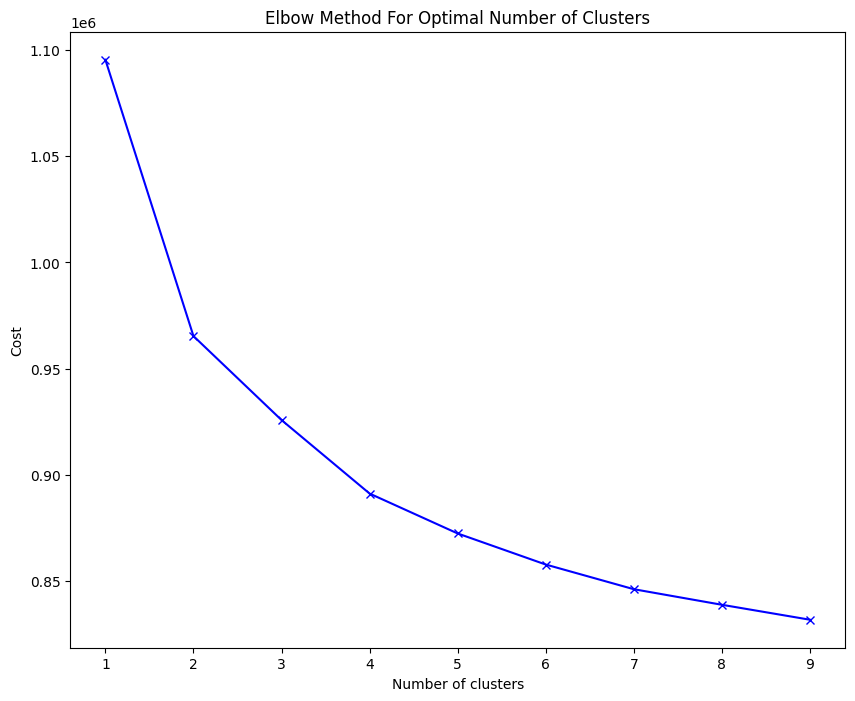

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 26746, cost: 925858.0
Run 1, iteration: 2/100, moves: 4068, cost: 925858.0
Cluster centroids:
[[0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 8 5 7 0 0]
 [1 1 1 1 0 0 0 0 0 0 1 0 2 1 1 7 3 6 0 0]
 [1 1 1 1 0 0 1 0 1 0 1 0 2 0 1 9 4 5 0 0]]

Cluster 0:
              HighBP       HighChol      CholCheck            BMI  \
count  102175.000000  102175.000000  102175.000000  102175.000000   
mean        0.290179       0.295092       0.953071      27.954480   
std         0.453847       0.456086       0.211488       6.590452   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000    

In [37]:
!pip install kmodes

import pandas as pd
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded with the required columns

# Define categorical predictor variables
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                    'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
                    'MentHlth', 'PhysHlth']

# Subset the X_train to only include the categorical predictor variables
categorical_data_train = X_train[categorical_vars].copy()

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in categorical_data_train.columns:
    categorical_data_train[col] = le.fit_transform(categorical_data_train[col])

# Determine the optimal number of clusters using the Elbow method
cost = []
K = range(1, 10)  # You can adjust the range as needed
for num_clusters in K:
    kmode = KModes(n_clusters=num_clusters, init='Cao', n_init=5, verbose=1)
    kmode.fit_predict(categorical_data_train)
    cost.append(kmode.cost_)

# Plot the cost to find the elbow
plt.figure(figsize=(10, 8))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# Based on the elbow plot, choose the optimal number of clusters (let's assume it is 3 for this example)
optimal_clusters = 3
kmode = KModes(n_clusters=optimal_clusters, init='Cao', n_init=5, verbose=1)
clusters = kmode.fit_predict(categorical_data_train)

# Add the cluster labels to the training data
X_train['Cluster'] = clusters

# Print the cluster centroids
print("Cluster centroids:")
print(kmode.cluster_centroids_)

# Analyze the clusters in the training data
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster}:")
    print(X_train[X_train['Cluster'] == cluster].describe())

# Optionally, save the results to a CSV file
X_train.to_csv('clustered_train_data.csv', index=False)


# 9.Feature scaling

Feature scaling is typically performed on numerical variables and not on categorical variables. Here's why:

1. Numerical Variables:
Purpose of Scaling: Numerical variables often need scaling because they can have different units, ranges, and magnitudes, which can affect the performance of machine learning algorithms. For example, features like age, income, and height can have vastly different scales, and scaling them ensures that each feature contributes equally to the distance calculations used in many algorithms.

2. Common Techniques: Standard scaling techniques for numerical variables include:

* Standardization (Z-score normalization): Transforms data to have a mean of 0 and a standard deviation of 1.

* Min-Max Scaling: Transforms data to fit within a specified range, usually [0, 1].

3. Categorical Variables:

* Nature of Data: Categorical variables represent discrete values or categories, which do not have an inherent order or scale that would benefit from scaling. Examples include gender, color, or type of fruit.

* Encoding Instead of Scaling: Categorical variables are typically encoded rather than scaled. Common encoding techniques include:
Label Encoding: Assigns each category a unique integer value. However, this can imply an ordinal relationship, which is not suitable for nominal categories.
One-Hot Encoding: Creates binary columns for each category, indicating the presence or absence of that category.

# Feature scaling is often performed using methods like standardization or normalization. Standardization scales the data to have a mean of 0 and a standard deviation of 1, while normalization scales the data to a range of [0, 1].

In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'BMI' column in the training set
X_train['BMI'] = scaler.fit_transform(X_train[['BMI']])

# Transform the 'BMI' column in the test set using the same scaler
X_test['BMI'] = scaler.transform(X_test[['BMI']])

print(X_train['BMI'].head())
print(X_test['BMI'].head())

200709   -0.251018
172536   -0.251018
43542    -0.251018
149953    1.958365
247858   -1.134771
Name: BMI, dtype: float64
218137   -0.692894
234092   -0.987479
220499   -0.545602
133305   -0.692894
1394     -0.103726
Name: BMI, dtype: float64




### Feature Scaling (`X_train['BMI']` and `X_test['BMI']`)

+ When we talk about feature scaling, such as standardization or normalization, it typically applies to numerical variables (in this case, 'BMI').
+ The purpose of scaling is to bring all numerical features to a similar scale to prevent one feature from dominating due to its larger magnitude.

+ For example, if you have a dataset with numerical variables like 'BMI', 'Age', and 'Income', and you decide to scale 'BMI', you might use standardization to transform the 'BMI' values in both `X_train` and `X_test` sets.
+ This ensures that 'BMI' values in both datasets are standardized according to the mean and standard deviation of 'BMI' in the training set.

### Renaming `X_train['BMI']` and `X_test['BMI']`
The term "rename" might be confusing here. After feature scaling, `X_train['BMI']` and `X_test['BMI']` refer to the same 'BMI' column in their respective datasets, but with scaled values.

+ It doesn't mean the column name has changed. Rather, the values within the 'BMI' column have been transformed (scaled).

### Can You Still Use `X_train` and `X_test` After Feature Scaling?

Yes, absolutely. After you scale the 'BMI' column in both `X_train` and `X_test`, you can continue using `X_train` and `X_test` for further preprocessing steps, such as encoding categorical variables (one-hot encoding and ordinal encoding, as discussed earlier).

### Example Process Flow:
1. **Feature Scaling**: Scale 'BMI' in both `X_train` and `X_test`.

2. **Encoding**: Separate categorical variables into nominal and ordinal, then encode them using `OneHotEncoder` and `OrdinalEncoder`.

3. **Model Training**: Use the preprocessed `X_train_final` dataset to train your machine learning model.

4. **Model Evaluation**: Use the preprocessed `X_test_final` dataset to evaluate your model's performance on unseen data.

### Final Note:
- **Data Consistency**: It's important to ensure that any preprocessing steps (like scaling and encoding) are applied consistently across both `X_train` and `X_test` to avoid data leakage and ensure that the model behaves correctly on new data.
- **Column Names**: After scaling 'BMI' or performing other transformations, the column names (`X_train['BMI']`, `X_test['BMI']`) remain the same; only the values within those columns are transformed.

I hope this clarifies the process for you! If you have any further questions or need more explanation, feel free to ask.

# 10.Encoding the categorical variables

*Categorical Variables*
Categorical variables are variables that represent categories or groups. They can take on a limited number of possible values, which are often names or labels. Categorical variables can be further classified into nominal and ordinal variables.

* Types of Categorical Variables:

1. Nominal Variables:

* Definition: Nominal variables are categorical variables where the order of the categories does not matter.
* The categories are simply different from each other, with no inherent ranking.

+ Example:

Colors of cars: red, blue, green, black, white
Types of fruit: apple, banana, orange, grape
Gender: male, female, other

2. Ordinal Variables:

* Definition: Ordinal variables are categorical variables where the order of the categories matters.
* The categories have a meaningful sequence, but the differences between the categories are not necessarily consistent.

+ Example:

Education level: primary school, high school, bachelor's degree, master's degree, PhD
Customer satisfaction rating: very dissatisfied, dissatisfied, neutral, satisfied, very satisfied
Socioeconomic status: low, middle, high

***In most cases, you would not perform one-hot or ordinal encoding on the target variable (y) in a supervised learning task, especially if it is a binary classification task. Instead, you typically convert the target variable to a numeric format suitable for the model you are using.***

In [39]:
# let's perform the encoding separately for the training set (X_train) and the test set (X_test).

#First, we'll split the categorical variables into nominal and ordinal categories,
#and then encode them using OneHotEncoder for nominal variables and OrdinalEncoder for ordinal variables.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# Define the categorical variables
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                    'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
                    'MentHlth', 'PhysHlth']

# Separate nominal and ordinal variables
nominal_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                'NoDocbcCost', 'DiffWalk', 'Sex']

ordinal_vars = ['GenHlth', 'Age', 'Education', 'Income', 'MentHlth', 'PhysHlth']


# Define the ordering for ordinal variables
ordinal_ordering = [
    list(range(1, 6)),  # GenHlth
    list(range(1, 14)),  # Age
    list(range(1, 7)),  # Education
    list(range(1, 9)),  # Income
    list(range(0, 31)),  # MentHlth
    list(range(0, 31)),  # PhysHlth

]

# One-hot encoding for nominal variables
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

# Ordinal encoding for ordinal variables
ordinal_encoder = OrdinalEncoder(categories=ordinal_ordering)

# Separate nominal and ordinal data in train and test sets
nominal_data_train = X_train[nominal_vars]
ordinal_data_train = X_train[ordinal_vars]

nominal_data_test = X_test[nominal_vars]
ordinal_data_test = X_test[ordinal_vars]

# Perform one-hot encoding on nominal data
encoded_nominal_data_train = one_hot_encoder.fit_transform(nominal_data_train)
encoded_nominal_data_test = one_hot_encoder.transform(nominal_data_test)

# Perform ordinal encoding on ordinal data
encoded_ordinal_data_train = ordinal_encoder.fit_transform(ordinal_data_train)
encoded_ordinal_data_test = ordinal_encoder.transform(ordinal_data_test)

# Convert encoded data to DataFrame
encoded_nominal_df_train = pd.DataFrame(encoded_nominal_data_train, columns=one_hot_encoder.get_feature_names_out(nominal_vars))
encoded_nominal_df_test = pd.DataFrame(encoded_nominal_data_test, columns=one_hot_encoder.get_feature_names_out(nominal_vars))

encoded_ordinal_df_train = pd.DataFrame(encoded_ordinal_data_train, columns=ordinal_vars)
encoded_ordinal_df_test = pd.DataFrame(encoded_ordinal_data_test, columns=ordinal_vars)

# Drop original nominal and ordinal columns from X_train and X_test
X_train_encoded = X_train.drop(columns=nominal_vars + ordinal_vars).reset_index(drop=True)
X_test_encoded = X_test.drop(columns=nominal_vars + ordinal_vars).reset_index(drop=True)

# Concatenate the encoded nominal and ordinal columns back to X_train and X_test
X_train_final = pd.concat([X_train_encoded, encoded_nominal_df_train, encoded_ordinal_df_train], axis=1)
X_test_final = pd.concat([X_test_encoded, encoded_nominal_df_test, encoded_ordinal_df_test], axis=1)

print(X_train_final.head())
print(X_test_final.head())





/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


        BMI  Cluster  HighBP_1.0  HighChol_1.0  CholCheck_1.0  Smoker_1.0  \
0 -0.251018        0         0.0           0.0            1.0         0.0   
1 -0.251018        0         0.0           1.0            1.0         0.0   
2 -0.251018        2         1.0           0.0            1.0         1.0   
3  1.958365        0         0.0           0.0            1.0         0.0   
4 -1.134771        0         0.0           0.0            1.0         1.0   

   Stroke_1.0  HeartDiseaseorAttack_1.0  PhysActivity_1.0  Fruits_1.0  ...  \
0         0.0                       0.0               0.0         0.0  ...   
1         0.0                       0.0               1.0         1.0  ...   
2         0.0                       0.0               1.0         0.0  ...   
3         0.0                       0.0               0.0         0.0  ...   
4         0.0                       0.0               1.0         1.0  ...   

   AnyHealthcare_1.0  NoDocbcCost_1.0  DiffWalk_1.0  Sex_1.0  GenHlt

+ When encoding ordinal variables, the range used to map the classes should match the number of distinct classes.
+ If a categorical variable has 5 distinct classes, you typically map these classes to a range with 5 unique numeric values.

# For example, if the classes are ['excellent', 'very good', 'good', 'fair', 'poor'], you can map them as follows:

* 'excellent' - 1
* 'very good' - 2
* 'good' - 3
* 'fair' - 4
* 'poor' - 5

**So, you would use the range range(1, 6) in Python, which generates the values [1, 2, 3, 4, 5].**

Here's a breakdown of the reasoning:

# range(1, 6) generates the sequence [1, 2, 3, 4, 5], covering all five classes.

If you used range(1, 5), it would generate the sequence [1, 2, 3, 4], which only covers four classes, and would not correctly map all five original classes.
Let's correct the mappings in your code accordingly:

In [40]:
X_train_final.head()

,BMI,Cluster,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,...,AnyHealthcare_1.0,NoDocbcCost_1.0,DiffWalk_1.0,Sex_1.0,GenHlth,Age,Education,Income,MentHlth,PhysHlth
0,-0.251018,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,3.0,4.0,6.0,0.0,30.0
1,-0.251018,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,10.0,3.0,3.0,7.0,7.0
2,-0.251018,2,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,2.0,11.0,5.0,7.0,0.0,0.0
3,1.958365,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,7.0,5.0,7.0,2.0,30.0
4,-1.134771,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,10.0,5.0,6.0,0.0,0.0


In [41]:
X_test_final.head()

,BMI,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,...,AnyHealthcare_1.0,NoDocbcCost_1.0,DiffWalk_1.0,Sex_1.0,GenHlth,Age,Education,Income,MentHlth,PhysHlth
0,-0.692894,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,9.0,5.0,7.0,2.0,10.0
1,-0.987479,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,12.0,4.0,3.0,0.0,0.0
2,-0.545602,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,9.0,3.0,3.0,0.0,0.0
3,-0.692894,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,4.0,9.0,2.0,0.0,0.0,16.0
4,-0.103726,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,11.0,2.0,1.0,0.0,0.0


# 11.Model fitting



1. **Logistic Regression** (Classifier)
2. **Ridge Classifier**
3. **Lasso** (Logistic Regression with L1 penalty)
4. **ElasticNet** (Logistic Regression with ElasticNet penalty)
5. **Linear Discriminant Analysis (LDA)** (Classifier)
6. **Quadratic Discriminant Analysis (QDA)** (Classifier)
7. **Support Vector Machine (SVM)** (Classifier)
8. **Gaussian Naive Bayes** (Classifier)
9. **K-Nearest Neighbors (KNN)** (Classifier)
10. **Decision Tree** (Classifier)
11. **Random Forest** (Classifier)
12. **AdaBoost** (Classifier)
13. **Gradient Boosting** (Classifier)
14. **XGBoost** (Classifier)
15. **CatBoost** (Classifier)
16. **LightGBM** (Classifier)

1.  *What is an Imbalanced Dataset?*

+An imbalanced dataset is one where the classes are not represented equally.
+ For example, in a binary classification problem, if 90% of the samples belong to class A and only 10% belong to class B, the dataset is imbalanced.
+ This can cause issues for machine learning models because they may become biased towards the majority class and perform poorly on the minority class.

2. Why is Imbalanced Data a Problem?

When a dataset is imbalanced, the machine learning model might:

+ Predict the majority class more often: The model may ignore the minority class because it has fewer samples to learn from.

+ Have skewed performance metrics: Accuracy might be high because the model predicts the majority class well, but other metrics like precision, recall, and F1-score might be poor for the minority class.

# Handling Imbalanced Datasets
There are several techniques to handle imbalanced datasets:

#Techniques related to handling imbalanced datasets in machine learning:

### 1. Resampling Techniques

**a. Oversampling the Minority Class:**

   - **Definition**: Oversampling involves increasing the number of instances in the minority class to balance the class distribution.

   - **Explanation**: This technique duplicates or synthesizes new instances from the minority class to match the number of instances in the majority class.

   - **Purpose**: It helps to ensure that the model is not biased towards the majority class and improves the performance of minority class prediction.

   - **Methods**: Techniques include Random Oversampling, SMOTE (Synthetic Minority Over-sampling Technique), ADASYN (Adaptive Synthetic Sampling), etc.

**b. Undersampling the Majority Class:**

   - **Definition**: Undersampling reduces the number of instances in the majority class to balance the class distribution.

   - **Explanation**: This technique randomly removes instances from the majority class until the class distribution is balanced.

   - **Purpose**: It aims to prevent the model from being overwhelmed by the majority class and potentially improves overall model performance.

   - **Methods**: Random Undersampling, Cluster-based Undersampling, NearMiss, etc.

### 2. Synthetic Data Generation

**a. SMOTE (Synthetic Minority Over-sampling Technique):**

   - **Definition**: SMOTE is a technique to generate synthetic samples for the minority class based on the feature similarity of existing minority instances.

   - **Explanation**: It creates synthetic samples by interpolating between existing minority class instances. New instances are generated along line segments joining k nearest neighbors.

   - **Purpose**: SMOTE addresses the issue of overfitting that can occur with simple oversampling techniques by introducing synthetic diversity.

   - **Method**: It calculates the K-nearest neighbors for minority class examples and creates new synthetic points between existing ones.

### 3. Algorithmic Techniques

**a. Class Weight Adjustment:**

   - **Definition**: Adjusting class weights assigns higher weights to minority class instances and lower weights to majority class instances during model training.

   - **Explanation**: This adjustment penalizes errors on the minority class more than on the majority class, thereby improving the model's sensitivity to minority class examples.

   - **Purpose**: It is a straightforward technique to handle class imbalance by directly influencing the model's cost function.

   - **Methods**: Implemented in algorithms like logistic regression, decision trees, SVMs, etc., through parameter settings or custom functions.

**b. Anomaly Detection Algorithms:**

   - **Definition**: Anomaly detection algorithms identify instances that are significantly different from the majority of the data, which can often represent the minority class.

   - **Explanation**: These algorithms detect outliers or anomalies that do not conform to expected patterns, which may include minority class instances.

   - **Purpose**: They can be adapted to identify and give special treatment to minority class instances during training or prediction.

   - **Methods**: Techniques like Isolation Forest, One-Class SVM, Local Outlier Factor (LOF), etc., are used to detect anomalies which might correspond to minority class instances in certain contexts.

### Summary

- **Resampling Techniques** aim to balance class distribution by either increasing (oversampling) or decreasing (undersampling) instances of certain classes.
- **Synthetic Data Generation**, particularly SMOTE, creates artificial instances to balance class representation and improve model performance.
- **Algorithmic Techniques** involve adjusting model parameters or using specialized algorithms to handle class imbalance during training and prediction.

Each technique offers a different approach to address class imbalance based on the characteristics of the dataset and the requirements of the machine learning problem.

# However, SMOTE (Synthetic Minority Over-sampling Technique) is often considered one of the most effective methods in many cases.

+ Why SMOTE is Popular

* Synthetic Diversity: Unlike simple oversampling methods that replicate existing minority instances, SMOTE generates new synthetic instances by interpolating between existing minority class instances. This can help the model learn a more generalizable decision boundary.

* Reduced Overfitting: By generating synthetic samples rather than replicating existing ones, SMOTE reduces the risk of overfitting, which is a common issue with random oversampling.

* Wide Application: SMOTE can be used with a variety of classification algorithms and is implemented in many machine learning libraries, making it accessible and easy to apply.

In [48]:
X_train_final.head()

,BMI,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,...,AnyHealthcare_1.0,NoDocbcCost_1.0,DiffWalk_1.0,Sex_1.0,GenHlth,Age,Education,Income,MentHlth,PhysHlth
0,-0.251018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,3.0,4.0,6.0,0.0,30.0
1,-0.251018,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,10.0,3.0,3.0,7.0,7.0
2,-0.251018,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,2.0,11.0,5.0,7.0,0.0,0.0
3,1.958365,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,3.0,7.0,5.0,7.0,2.0,30.0
4,-1.134771,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,10.0,5.0,6.0,0.0,0.0


In [49]:
X_test_final.head()

,BMI,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,...,AnyHealthcare_1.0,NoDocbcCost_1.0,DiffWalk_1.0,Sex_1.0,GenHlth,Age,Education,Income,MentHlth,PhysHlth
0,-0.692894,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,9.0,5.0,7.0,2.0,10.0
1,-0.987479,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,12.0,4.0,3.0,0.0,0.0
2,-0.545602,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,9.0,3.0,3.0,0.0,0.0
3,-0.692894,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,4.0,9.0,2.0,0.0,0.0,16.0
4,-0.103726,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,11.0,2.0,1.0,0.0,0.0


In [42]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.0 MB/s eta 0:00:00


# i. Logistic Regression

In [57]:
# Ensure both training and test sets have the same features

# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Assuming X_train_final and y_train are your training data
# Assuming X_test_final and y_test are your test data

# Create a pipeline with StandardScaler and LogisticRegression
log_reg = make_pipeline(StandardScaler(), LogisticRegression())

# Fit the model
log_reg.fit(X_train_final, y_train)

# Predict on the training set
y_train_pred = log_reg.predict(X_train_final)

# Predict on the test set
y_test_pred = log_reg.predict(X_test_final)

# Print evaluation metrics
print('Logistic Regression Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')


Logistic Regression Results:
Train Accuracy: 0.8508507075222093
Test Accuracy: 0.8495707624595094
Train F1 Score: 0.8130325656626984
Test F1 Score: 0.811223510795658
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     58250
         1.0       0.54      0.15      0.23     10593

    accuracy                           0.85     68843
   macro avg       0.70      0.56      0.57     68843
weighted avg       0.81      0.85      0.81     68843

Confusion Matrix (Test):
 [[56926  1324]
 [ 9032  1561]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92    136127
         1.0       0.54      0.15      0.23     24504

    accuracy                           0.85    160631
   macro avg       0.70      0.56      0.58    160631
weighted avg       0.82      0.85      0.81    160631

Confusion Matrix (Train):
 [[133028   3099]
 [ 20859   3645]

# ii.Ridge Classifier

In [50]:
# Imports
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

ridge = RidgeClassifier()
ridge.fit(X_train_final, y_train)
y_train_pred = ridge.predict(X_train_final)
y_test_pred = ridge.predict(X_test_final)
print('Ridge Classifier Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')


Ridge Classifier Results:
Train Accuracy: 0.8493752762542722
Test Accuracy: 0.8484522754673678
Train F1 Score: 0.7890823539341295
Test F1 Score: 0.7878826323713661
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     58250
         1.0       0.62      0.04      0.08     10593

    accuracy                           0.85     68843
   macro avg       0.73      0.52      0.50     68843
weighted avg       0.81      0.85      0.79     68843

Confusion Matrix (Test):
 [[57985   265]
 [10168   425]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92    136127
         1.0       0.60      0.04      0.07     24504

    accuracy                           0.85    160631
   macro avg       0.72      0.52      0.50    160631
weighted avg       0.81      0.85      0.79    160631

Confusion Matrix (Train):
 [[135487    640]
 [ 23555    949]]


# iii.Lasso classifier

In [51]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

lasso = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='saga'))
lasso.fit(X_train_final, y_train)
y_train_pred = lasso.predict(X_train_final)
y_test_pred = lasso.predict(X_test_final)
print('Lasso Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')

Lasso Results:
Train Accuracy: 0.8508444820738214
Test Accuracy: 0.8495707624595094
Train F1 Score: 0.8130352657075349
Test F1 Score: 0.811223510795658
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     58250
         1.0       0.54      0.15      0.23     10593

    accuracy                           0.85     68843
   macro avg       0.70      0.56      0.57     68843
weighted avg       0.81      0.85      0.81     68843

Confusion Matrix (Test):
 [[56926  1324]
 [ 9032  1561]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92    136127
         1.0       0.54      0.15      0.23     24504

    accuracy                           0.85    160631
   macro avg       0.70      0.56      0.58    160631
weighted avg       0.82      0.85      0.81    160631

Confusion Matrix (Train):
 [[133026   3101]
 [ 20858   3646]]
------------

# iv.ElasticNet classifier

In [52]:

elastic_net = make_pipeline(StandardScaler(), LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga'))
elastic_net.fit(X_train_final, y_train)
y_train_pred = elastic_net.predict(X_train_final)
y_test_pred = elastic_net.predict(X_test_final)
print('ElasticNet Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')

ElasticNet Results:
Train Accuracy: 0.8508569329705972
Test Accuracy: 0.8495707624595094
Train F1 Score: 0.8130438709154955
Test F1 Score: 0.811223510795658
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     58250
         1.0       0.54      0.15      0.23     10593

    accuracy                           0.85     68843
   macro avg       0.70      0.56      0.57     68843
weighted avg       0.81      0.85      0.81     68843

Confusion Matrix (Test):
 [[56926  1324]
 [ 9032  1561]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92    136127
         1.0       0.54      0.15      0.23     24504

    accuracy                           0.85    160631
   macro avg       0.70      0.56      0.58    160631
weighted avg       0.82      0.85      0.81    160631

Confusion Matrix (Train):
 [[133028   3099]
 [ 20858   3646]]
-------

# v.Linear Discriminant Analysis

In [55]:
# Imports
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda.fit(X_train_final, y_train)

# Predict on the training set
y_train_pred = lda.predict(X_train_final)

# Predict on the test set
y_test_pred = lda.predict(X_test_final)

# Print evaluation metrics
print('Linear Discriminant Analysis Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')

Linear Discriminant Analysis Results:
Train Accuracy: 0.849698999570444
Test Accuracy: 0.8480165013145854
Train F1 Score: 0.8179444998892822
Test F1 Score: 0.8155696604747
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58250
         1.0       0.52      0.18      0.27     10593

    accuracy                           0.85     68843
   macro avg       0.69      0.57      0.59     68843
weighted avg       0.81      0.85      0.82     68843

Confusion Matrix (Test):
 [[56468  1782]
 [ 8681  1912]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92    136127
         1.0       0.52      0.18      0.27     24504

    accuracy                           0.85    160631
   macro avg       0.69      0.58      0.59    160631
weighted avg       0.82      0.85      0.82    160631

Confusion Matrix (Train):
 [[131975   4152]
 [ 19991  

# vi.  Quadratic Discriminant Analysis

In [58]:
# Imports
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix



# Initialize the QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit the model on the training data
qda.fit(X_train_final, y_train)

# Predict on the training set
y_train_pred = qda.predict(X_train_final)

# Predict on the test set
y_test_pred = qda.predict(X_test_final)

# Print evaluation metrics
print('Quadratic Discriminant Analysis Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')


Quadratic Discriminant Analysis Results:
Train Accuracy: 0.7544683155804297
Test Accuracy: 0.7567508679168543
Train F1 Score: 0.778626081718014
Test F1 Score: 0.7801228695228132
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.91      0.79      0.85     58250
         1.0       0.33      0.56      0.42     10593

    accuracy                           0.76     68843
   macro avg       0.62      0.68      0.63     68843
weighted avg       0.82      0.76      0.78     68843

Confusion Matrix (Test):
 [[46142 12108]
 [ 4638  5955]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.91      0.79      0.84    136127
         1.0       0.32      0.56      0.41     24504

    accuracy                           0.75    160631
   macro avg       0.62      0.67      0.63    160631
weighted avg       0.82      0.75      0.78    160631

Confusion Matrix (Train):
 [[107485  28642]
 [ 1

## vii. K-Nearest Neighbors (KNN) (Classifier)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Initialize the KNN model
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(X_train_final, y_train)

# Predict on the training set
y_train_pred = knn.predict(X_train_final)

# Predict on the test set
y_test_pred = knn.predict(X_test_final)

# Print evaluation metrics
print('K-Nearest Neighbors Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')


K-Nearest Neighbors Results:
Train Accuracy: 0.8753851996190025
Test Accuracy: 0.8307017416440307
Train F1 Score: 0.8570006223165435
Test F1 Score: 0.8041094037443154
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     58250
         1.0       0.39      0.19      0.25     10593

    accuracy                           0.83     68843
   macro avg       0.63      0.57      0.58     68843
weighted avg       0.79      0.83      0.80     68843

Confusion Matrix (Test):
 [[55227  3023]
 [ 8632  1961]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93    136127
         1.0       0.69      0.34      0.45     24504

    accuracy                           0.88    160631
   macro avg       0.79      0.66      0.69    160631
weighted avg       0.86      0.88      0.86    160631

Confusion Matrix (Train):
 [[132317   3810]
 [ 16207   8297

# viii.Decision Tree (Classifier)

In [61]:
# Ensure scikit-learn is installed
!pip install scikit-learn

# Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_final, y_train)
y_train_pred = dt.predict(X_train_final)
y_test_pred = dt.predict(X_test_final)
print('Decision Tree Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')


Decision Tree Results:
Train Accuracy: 0.9953807172961633
Test Accuracy: 0.7725694696628561
Train F1 Score: 0.995351488433856
Test F1 Score: 0.778156714729187
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     58250
         1.0       0.29      0.33      0.31     10593

    accuracy                           0.77     68843
   macro avg       0.58      0.59      0.59     68843
weighted avg       0.78      0.77      0.78     68843

Confusion Matrix (Test):
 [[49732  8518]
 [ 7139  3454]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    136127
         1.0       1.00      0.97      0.98     24504

    accuracy                           1.00    160631
   macro avg       1.00      0.98      0.99    160631
weighted avg       1.00      1.00      1.00    160631

Confusion Matrix (Train):
 [[136127      0]
 [   742  23762]]
-----

# ix. Random Forest (Classifier)

In [62]:
# Ensure scikit-learn is installed
!pip install scikit-learn

# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_final, y_train)
y_train_pred = rf.predict(X_train_final)
y_test_pred = rf.predict(X_test_final)
print('Random Forest Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')


Random Forest Results:
Train Accuracy: 0.9953682663993875
Test Accuracy: 0.843150356608515
Train F1 Score: 0.9953477655678429
Test F1 Score: 0.8102567332366855
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     58250
         1.0       0.47      0.17      0.25     10593

    accuracy                           0.84     68843
   macro avg       0.67      0.57      0.58     68843
weighted avg       0.80      0.84      0.81     68843

Confusion Matrix (Test):
 [[56261  1989]
 [ 8809  1784]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    136127
         1.0       1.00      0.97      0.98     24504

    accuracy                           1.00    160631
   macro avg       1.00      0.99      0.99    160631
weighted avg       1.00      1.00      1.00    160631

Confusion Matrix (Train):
 [[136016    111]
 [   633  23871]]
----

# x.XGBoost (Classifier)

In [63]:
# Ensure xgboost is installed
!pip install xgboost

# Imports
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train_final, y_train)
y_train_pred = xgb.predict(X_train_final)
y_test_pred = xgb.predict(X_test_final)
print('XGBoost Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')


XGBoost Results:
Train Accuracy: 0.8664081030436217
Test Accuracy: 0.8511831268248042
Train F1 Score: 0.8355985033766542
Test F1 Score: 0.8164763140885309
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58250
         1.0       0.55      0.17      0.26     10593

    accuracy                           0.85     68843
   macro avg       0.71      0.57      0.59     68843
weighted avg       0.82      0.85      0.82     68843

Confusion Matrix (Test):
 [[56776  1474]
 [ 8771  1822]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    136127
         1.0       0.70      0.22      0.33     24504

    accuracy                           0.87    160631
   macro avg       0.79      0.60      0.63    160631
weighted avg       0.85      0.87      0.84    160631

Confusion Matrix (Train):
 [[133772   2355]
 [ 19104   5400]]
---------

# xi.AdaBoost (Classifier)

In [64]:
# Ensure scikit-learn is installed
!pip install scikit-learn

# Imports
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train_final, y_train)
y_train_pred = ada.predict(X_train_final)
y_test_pred = ada.predict(X_test_final)
print('AdaBoost Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')


AdaBoost Results:
Train Accuracy: 0.8528428510063437
Test Accuracy: 0.851197652629897
Train F1 Score: 0.8191717216156555
Test F1 Score: 0.8168805791681947
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58250
         1.0       0.55      0.17      0.27     10593

    accuracy                           0.85     68843
   macro avg       0.71      0.57      0.59     68843
weighted avg       0.82      0.85      0.82     68843

Confusion Matrix (Test):
 [[56751  1499]
 [ 8745  1848]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92    136127
         1.0       0.56      0.18      0.27     24504

    accuracy                           0.85    160631
   macro avg       0.71      0.58      0.59    160631
weighted avg       0.82      0.85      0.82    160631

Confusion Matrix (Train):
 [[132641   3486]
 [ 20152   4352]]
---------

# xii.Gradient Boosting (Classifier)

In [65]:
# Ensure scikit-learn is installed
!pip install scikit-learn

# Imports
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_final, y_train)
y_train_pred = gb.predict(X_train_final)
y_test_pred = gb.predict(X_test_final)
print('Gradient Boosting Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')


Gradient Boosting Results:
Train Accuracy: 0.8545673002097977
Test Accuracy: 0.8521127783507401
Train F1 Score: 0.8185478834175522
Test F1 Score: 0.8154117365175868
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     58250
         1.0       0.57      0.16      0.25     10593

    accuracy                           0.85     68843
   macro avg       0.72      0.57      0.58     68843
weighted avg       0.82      0.85      0.82     68843

Confusion Matrix (Test):
 [[56951  1299]
 [ 8882  1711]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    136127
         1.0       0.58      0.17      0.26     24504

    accuracy                           0.85    160631
   macro avg       0.72      0.57      0.59    160631
weighted avg       0.82      0.85      0.82    160631

Confusion Matrix (Train):
 [[133200   2927]
 [ 20434   4070]]

# xiii.CatBoost (Classifier)

In [66]:
# Ensure catboost is installed
!pip install catboost

# Imports
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# CatBoost
cb = CatBoostClassifier(verbose=0)
cb.fit(X_train_final, y_train)
y_train_pred = cb.predict(X_train_final)
y_test_pred = cb.predict(X_test_final)
print('CatBoost Results:')
print('Train Accuracy:', accuracy_score(y_train, y_train_pred))
print('Test Accuracy:', accuracy_score(y_test, y_test_pred))
print('Train F1 Score:', f1_score(y_train, y_train_pred, average='weighted'))
print('Test F1 Score:', f1_score(y_test, y_test_pred, average='weighted'))
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Classification Report (Train):\n', classification_report(y_train, y_train_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train, y_train_pred))
print('----------------------------------------------------------')


CatBoost Results:
Train Accuracy: 0.8690476931600999
Test Accuracy: 0.8514010139011955
Train F1 Score: 0.8391271960526993
Test F1 Score: 0.8161720239086131
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     58250
         1.0       0.56      0.17      0.26     10593

    accuracy                           0.85     68843
   macro avg       0.71      0.57      0.59     68843
weighted avg       0.82      0.85      0.82     68843

Confusion Matrix (Test):
 [[56821  1429]
 [ 8801  1792]]
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    136127
         1.0       0.72      0.23      0.35     24504

    accuracy                           0.87    160631
   macro avg       0.80      0.61      0.64    160631
weighted avg       0.85      0.87      0.84    160631

Confusion Matrix (Train):
 [[133935   2192]
 [ 18843   5661]]
--------

# * SMOTE

(Synthetic Minority Over-sampling Technique) should only be applied to the training set.
* Applying SMOTE to both the training and test sets can lead to data leakage, where information from the training set is unintentionally included in the test set, leading to overly optimistic performance estimates. Here’s why:

+ Training Set: The purpose of SMOTE is to balance the classes by creating synthetic examples of the minority class.This helps the model learn better by providing it with a more balanced set of data.

+ Test Set: The test set should remain untouched and represent the real-world scenario where the class imbalance exists. This allows you to evaluate the model's performance on data it hasn’t seen before, ensuring a realistic assessment of its capabilities.

# ***APPLYING SMOTE ON THE TRAINING SET***

In [67]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Step 1: Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

# Check the class distribution before and after applying SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

print("After SMOTE:")
print(pd.Series(y_train_resampled).value_counts())



Before SMOTE:
Diabetes_binary
0.0    136127
1.0     24504
Name: count, dtype: int64
After SMOTE:
Diabetes_binary
0.0    136127
1.0    136127
Name: count, dtype: int64


# i.Logistic Regression (Classifier)


In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import pandas as pd

# Assuming X_train_final and y_train are your training data
# Assuming X_test_final and y_test are your test dat
# X_train_resampled, y_train_resampled are your new training set after SMOTE


# Initialize the model (e.g., Logistic Regression)
model = LogisticRegression()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics for the test set
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))

# Print evaluation metrics for the resampled training set
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))

# Check for overfitting
overfitting = (train_accuracy - test_accuracy) > 0.05
print("\nOverfitting:", overfitting)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy: 0.7200877358627602
Test F1 Score: 0.7566091177970382
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     58250
         1.0       0.32      0.75      0.45     10593

    accuracy                           0.72     68843
   macro avg       0.63      0.73      0.63     68843
weighted avg       0.84      0.72      0.76     68843

Confusion Matrix (Test):
 [[41644 16606]
 [ 2664  7929]]
Train Accuracy: 0.7409808487662256
Train F1 Score: 0.740736682622725
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.76      0.71      0.73    136127
         1.0       0.73      0.77      0.75    136127

    accuracy                           0.74    272254
   macro avg       0.74      0.74      0.74    272254
weighted avg       0.74      0.74      0.74    272254

Confusion Matrix (Train):
 [[ 96690  39437]
 [ 31082 105045]]

Overfitting: False


# ii.Ridge Classifier

In [69]:
# Ridge Classifier
model = RidgeClassifier()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('Ridge Classifier Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


Ridge Classifier Results:
Test Accuracy: 0.7124181107737897
Test F1 Score: 0.7505437349995081
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.94      0.70      0.81     58250
         1.0       0.32      0.76      0.45     10593

    accuracy                           0.71     68843
   macro avg       0.63      0.73      0.63     68843
weighted avg       0.85      0.71      0.75     68843

Confusion Matrix (Test):
 [[41009 17241]
 [ 2557  8036]]
Train Accuracy: 0.7412306155281465
Train F1 Score: 0.7407869901068412
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73    136127
         1.0       0.72      0.78      0.75    136127

    accuracy                           0.74    272254
   macro avg       0.74      0.74      0.74    272254
weighted avg       0.74      0.74      0.74    272254

Confusion Matrix (Train):
 [[ 95270  40857]
 [ 29594 106533]]


# iii.Lasso (Logistic Regression with L1 penalty)


In [70]:
# Lasso
model = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='saga'))

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('Lasso Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


Lasso Results:
Test Accuracy: 0.7206106648460991
Test F1 Score: 0.7569552485042609
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     58250
         1.0       0.32      0.74      0.45     10593

    accuracy                           0.72     68843
   macro avg       0.63      0.73      0.63     68843
weighted avg       0.84      0.72      0.76     68843

Confusion Matrix (Test):
 [[41725 16525]
 [ 2709  7884]]
Train Accuracy: 0.7420019540576079
Train F1 Score: 0.7417632744153335
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.76      0.71      0.73    136127
         1.0       0.73      0.77      0.75    136127

    accuracy                           0.74    272254
   macro avg       0.74      0.74      0.74    272254
weighted avg       0.74      0.74      0.74    272254

Confusion Matrix (Train):
 [[ 96868  39259]
 [ 30982 105145]]
-----------

# iv.ElasticNet classifier (Logistic Regression with ElasticNet penalty)


In [71]:
# ElasticNet
model = make_pipeline(StandardScaler(), LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga'))

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('ElasticNet Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


ElasticNet Results:
Test Accuracy: 0.7205961390410064
Test F1 Score: 0.7569417399473661
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     58250
         1.0       0.32      0.74      0.45     10593

    accuracy                           0.72     68843
   macro avg       0.63      0.73      0.63     68843
weighted avg       0.84      0.72      0.76     68843

Confusion Matrix (Test):
 [[41725 16525]
 [ 2710  7883]]
Train Accuracy: 0.7420166462200739
Train F1 Score: 0.7417780956019429
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.76      0.71      0.73    136127
         1.0       0.73      0.77      0.75    136127

    accuracy                           0.74    272254
   macro avg       0.74      0.74      0.74    272254
weighted avg       0.74      0.74      0.74    272254

Confusion Matrix (Train):
 [[ 96871  39256]
 [ 30981 105146]]
------

# v.Linear Discriminant Analysis (LDA) (Classifier)


In [72]:
# Linear Discriminant Analysis
model = LinearDiscriminantAnalysis()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('Linear Discriminant Analysis Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


Linear Discriminant Analysis Results:
Test Accuracy: 0.7124181107737897
Test F1 Score: 0.7505437349995081
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.94      0.70      0.81     58250
         1.0       0.32      0.76      0.45     10593

    accuracy                           0.71     68843
   macro avg       0.63      0.73      0.63     68843
weighted avg       0.85      0.71      0.75     68843

Confusion Matrix (Test):
 [[41009 17241]
 [ 2557  8036]]
Train Accuracy: 0.7412306155281465
Train F1 Score: 0.7407869901068412
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73    136127
         1.0       0.72      0.78      0.75    136127

    accuracy                           0.74    272254
   macro avg       0.74      0.74      0.74    272254
weighted avg       0.74      0.74      0.74    272254

Confusion Matrix (Train):
 [[ 95270  40857]
 [ 295

# vi.Quadratic Discriminant Analysis (QDA) (Classifier)


In [73]:
# Quadratic Discriminant Analysis
model = QuadraticDiscriminantAnalysis()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('Quadratic Discriminant Analysis Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


Quadratic Discriminant Analysis Results:
Test Accuracy: 0.5513995613206862
Test F1 Score: 0.6076302349281487
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.96      0.49      0.65     58250
         1.0       0.24      0.88      0.38     10593

    accuracy                           0.55     68843
   macro avg       0.60      0.69      0.51     68843
weighted avg       0.85      0.55      0.61     68843

Confusion Matrix (Test):
 [[28633 29617]
 [ 1266  9327]]
Train Accuracy: 0.6943552711805887
Train F1 Score: 0.6808521245497593
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.83      0.49      0.62    136127
         1.0       0.64      0.90      0.75    136127

    accuracy                           0.69    272254
   macro avg       0.73      0.69      0.68    272254
weighted avg       0.73      0.69      0.68    272254

Confusion Matrix (Train):
 [[ 66520  69607]
 [ 

# viii.K-Nearest Neighbors (KNN) (Classifier)


In [77]:
# K-Nearest Neighbors
model = KNeighborsClassifier()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('K-Nearest Neighbors Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


K-Nearest Neighbors Results:
Test Accuracy: 0.6744331304562555
Test F1 Score: 0.7174639204633033
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.91      0.68      0.78     58250
         1.0       0.26      0.63      0.37     10593

    accuracy                           0.67     68843
   macro avg       0.59      0.66      0.58     68843
weighted avg       0.81      0.67      0.72     68843

Confusion Matrix (Test):
 [[39777 18473]
 [ 3940  6653]]
Train Accuracy: 0.8806114878018321
Train F1 Score: 0.8790200206527614
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.99      0.77      0.87    136127
         1.0       0.81      1.00      0.89    136127

    accuracy                           0.88    272254
   macro avg       0.90      0.88      0.88    272254
weighted avg       0.90      0.88      0.88    272254

Confusion Matrix (Train):
 [[104262  31865]
 [   639 135488

# ix. Decision Tree (Classifier)


In [78]:
# Decision Tree
model = DecisionTreeClassifier()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('Decision Tree Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


Decision Tree Results:
Test Accuracy: 0.7695916796188429
Test F1 Score: 0.7764140544125331
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     58250
         1.0       0.29      0.33      0.31     10593

    accuracy                           0.77     68843
   macro avg       0.58      0.59      0.58     68843
weighted avg       0.78      0.77      0.78     68843

Confusion Matrix (Test):
 [[49473  8777]
 [ 7085  3508]]
Train Accuracy: 0.9972746038625695
Train F1 Score: 0.997274583618765
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    136127
         1.0       1.00      0.99      1.00    136127

    accuracy                           1.00    272254
   macro avg       1.00      1.00      1.00    272254
weighted avg       1.00      1.00      1.00    272254

Confusion Matrix (Train):
 [[136127      0]
 [   742 135385]]
----

# x.Random Forest (Classifier)


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Random Forest
model = RandomForestClassifier()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('Random Forest Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


Random Forest Results:
Test Accuracy: 0.8371221474950249
Test F1 Score: 0.8123595093671164
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     58250
         1.0       0.44      0.21      0.29     10593

    accuracy                           0.84     68843
   macro avg       0.65      0.58      0.60     68843
weighted avg       0.80      0.84      0.81     68843

Confusion Matrix (Test):
 [[55384  2866]
 [ 8347  2246]]
Train Accuracy: 0.9972635847407201
Train F1 Score: 0.9972635832492114
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    136127
         1.0       1.00      1.00      1.00    136127

    accuracy                           1.00    272254
   macro avg       1.00      1.00      1.00    272254
weighted avg       1.00      1.00      1.00    272254

Confusion Matrix (Train):
 [[135855    272]
 [   473 135654]]
---

# xi.AdaBoost (Classifier)


In [80]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
model = AdaBoostClassifier()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('AdaBoost Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


AdaBoost Results:
Test Accuracy: 0.7877925134000552
Test F1 Score: 0.8032231976890737
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.91      0.83      0.87     58250
         1.0       0.37      0.54      0.44     10593

    accuracy                           0.79     68843
   macro avg       0.64      0.69      0.66     68843
weighted avg       0.83      0.79      0.80     68843

Confusion Matrix (Test):
 [[48461  9789]
 [ 4820  5773]]
Train Accuracy: 0.842081291734924
Train F1 Score: 0.842056193185546
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.85      0.83      0.84    136127
         1.0       0.83      0.85      0.84    136127

    accuracy                           0.84    272254
   macro avg       0.84      0.84      0.84    272254
weighted avg       0.84      0.84      0.84    272254

Confusion Matrix (Train):
 [[112914  23213]
 [ 19781 116346]]
----------

# xii.Gradient Boosting (Classifier)


In [81]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
model = GradientBoostingClassifier()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('Gradient Boosting Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


Gradient Boosting Results:
Test Accuracy: 0.8242813357930363
Test F1 Score: 0.824662163349728
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     58250
         1.0       0.43      0.43      0.43     10593

    accuracy                           0.82     68843
   macro avg       0.66      0.66      0.66     68843
weighted avg       0.83      0.82      0.82     68843

Confusion Matrix (Test):
 [[52145  6105]
 [ 5992  4601]]
Train Accuracy: 0.8785949885033829
Train F1 Score: 0.8785668954450528
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88    136127
         1.0       0.89      0.86      0.88    136127

    accuracy                           0.88    272254
   macro avg       0.88      0.88      0.88    272254
weighted avg       0.88      0.88      0.88    272254

Confusion Matrix (Train):
 [[121671  14456]
 [ 18597 117530]]


# xiii.XGBoost (Classifier)


In [82]:
from xgboost import XGBClassifier

# XGBoost
model = XGBClassifier()

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('XGBoost Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


XGBoost Results:
Test Accuracy: 0.851430065511381
Test F1 Score: 0.8208618151020539
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58250
         1.0       0.55      0.20      0.29     10593

    accuracy                           0.85     68843
   macro avg       0.71      0.58      0.60     68843
weighted avg       0.82      0.85      0.82     68843

Confusion Matrix (Test):
 [[56504  1746]
 [ 8482  2111]]
Train Accuracy: 0.9146715934384803
Train F1 Score: 0.9143685156579824
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92    136127
         1.0       0.97      0.86      0.91    136127

    accuracy                           0.91    272254
   macro avg       0.92      0.91      0.91    272254
weighted avg       0.92      0.91      0.91    272254

Confusion Matrix (Train):
 [[132610   3517]
 [ 19714 116413]]
----------

# xiv.CatBoost (Classifier)


In [83]:
from catboost import CatBoostClassifier

# CatBoost
model = CatBoostClassifier(verbose=0)

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred = model.predict(X_test_final)

# Predict on the resampled training set to check for overfitting
y_train_resampled_pred = model.predict(X_train_resampled)

# Calculate accuracy and F1 score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Calculate accuracy and F1 score for the resampled training set
train_accuracy = accuracy_score(y_train_resampled, y_train_resampled_pred)
train_f1 = f1_score(y_train_resampled, y_train_resampled_pred, average='weighted')

# Print evaluation metrics
print('CatBoost Results:')
print('Test Accuracy:', test_accuracy)
print('Test F1 Score:', test_f1)
print('Classification Report (Test):\n', classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))
print('Train Accuracy:', train_accuracy)
print('Train F1 Score:', train_f1)
print('Classification Report (Train):\n', classification_report(y_train_resampled, y_train_resampled_pred))
print('Confusion Matrix (Train):\n', confusion_matrix(y_train_resampled, y_train_resampled_pred))
print('----------------------------------------------------------')


CatBoost Results:
Test Accuracy: 0.8506747236465582
Test F1 Score: 0.8172708910989176
Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58250
         1.0       0.54      0.18      0.27     10593

    accuracy                           0.85     68843
   macro avg       0.71      0.58      0.59     68843
weighted avg       0.82      0.85      0.82     68843

Confusion Matrix (Test):
 [[56664  1586]
 [ 8694  1899]]
Train Accuracy: 0.9235530056491364
Train F1 Score: 0.923287030240022
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    136127
         1.0       0.98      0.86      0.92    136127

    accuracy                           0.92    272254
   macro avg       0.93      0.92      0.92    272254
weighted avg       0.93      0.92      0.92    272254

Confusion Matrix (Train):
 [[133736   2391]
 [ 18422 117705]]
---------

# ***HYPERPARAMETR TUNING***

1. Logistic Regression
# Without SMOTE:

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the model
logistic_model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Logistic Regression (without SMOTE): {best_params}")
print(f"Best F1 Score for Logistic Regression (without SMOTE): {best_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters for Logistic Regression (without SMOTE): {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score for Logistic Regression (without SMOTE): 0.8128835657523765


# With SMOTE:

In [85]:
# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Logistic Regression (with SMOTE): {best_params}")
print(f"Best F1 Score for Logistic Regression (with SMOTE): {best_score}")


Best parameters for Logistic Regression (with SMOTE): {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 Score for Logistic Regression (with SMOTE): 0.7414000466203216


2. Random Forest
# Without SMOTE:

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Random Forest (without SMOTE): {best_params}")
print(f"Best F1 Score for Random Forest (without SMOTE): {best_score}")


Best parameters for Random Forest (without SMOTE): {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Score for Random Forest (without SMOTE): 0.8158396672985845


# With SMOTE:



In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Random Forest (with SMOTE): {best_params}")
print(f"Best F1 Score for Random Forest (with SMOTE): {best_score}")


4. Gradient Boosting
# Without SMOTE:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Gradient Boosting (without SMOTE): {best_params}")
print(f"Best F1 Score for Gradient Boosting (without SMOTE): {best_score}")


# With SMOTE:



In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Gradient Boosting (with SMOTE): {best_params}")
print(f"Best F1 Score for Gradient Boosting (with SMOTE): {best_score}")


5. XGBoost
# Without SMOTE:

In [ ]:
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0]
}

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for XGBoost (without SMOTE): {best_params}")
print(f"Best F1 Score for XGBoost (without SMOTE): {best_score}")


# With SMOTE:



In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for XGBoost (with SMOTE): {best_params}")
print(f"Best F1 Score for XGBoost (with SMOTE): {best_score}")


6. CatBoost
# Without SMOTE:

In [ ]:
from catboost import CatBoostClassifier

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7]
}

# Initialize the model
catboost_model = CatBoostClassifier(verbose=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for CatBoost (without SMOTE): {best_params}")
print(f"Best F1 Score for CatBoost (without SMOTE): {best_score}")


# With SMOTE:



In [ ]:
# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'depth': [3, 4, 5]
}

# Initialize the model
cat_model = CatBoostClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(cat_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for CatBoost (with SMOTE): {best_params}")
print(f"Best F1 Score for CatBoost (with SMOTE): {best_score}")


7. Ridge Classifier
# Without SMOTE:

In [1]:
from sklearn.linear_model import RidgeClassifier

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100]
}

# Initialize the model
ridge_model = RidgeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Ridge Classifier (without SMOTE): {best_params}")
print(f"Best F1 Score for Ridge Classifier (without SMOTE): {best_score}")


NameError: name 'GridSearchCV' is not defined

# With SMOTE:



In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Ridge Classifier (with SMOTE): {best_params}")
print(f"Best F1 Score for Ridge Classifier (with SMOTE): {best_score}")


8. Lasso
# Without SMOTE:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['saga']
}

# Initialize the model
lasso_model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Lasso (without SMOTE): {best_params}")
print(f"Best F1 Score for Lasso (without SMOTE): {best_score}")


# With SMOTE:



In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Lasso (with SMOTE): {best_params}")
print(f"Best F1 Score for Lasso (with SMOTE): {best_score}")


9. ElasticNet
# Without SMOTE:

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.1, 0.5, 0.9],
    'solver': ['saga']
}

# Initialize the model
elasticnet_model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(elasticnet_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for ElasticNet (without SMOTE): {best_params}")
print(f"Best F1 Score for ElasticNet (without SMOTE): {best_score}")


# With SMOTE:

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(elasticnet_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for ElasticNet (with SMOTE): {best_params}")
print(f"Best F1 Score for ElasticNet (with SMOTE): {best_score}")


10. Linear Discriminant Analysis (LDA)
# Without SMOTE:

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the parameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

# Initialize the model
lda_model = LinearDiscriminantAnalysis()

# Initialize GridSearchCV
grid_search = GridSearchCV(lda_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for LDA (without SMOTE): {best_params}")
print(f"Best F1 Score for LDA (without SMOTE): {best_score}")


# With SMOTE:





In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(lda_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for LDA (with SMOTE): {best_params}")
print(f"Best F1 Score for LDA (with SMOTE): {best_score}")


11. Quadratic Discriminant Analysis (QDA)
# Without SMOTE:

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define the parameter grid
param_grid = {
    'reg_param': [0.0, 0.1, 0.5, 1.0]
}

# Initialize the model
qda_model = QuadraticDiscriminantAnalysis()

# Initialize GridSearchCV
grid_search = GridSearchCV(qda_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for QDA (without SMOTE): {best_params}")
print(f"Best F1 Score for QDA (without SMOTE): {best_score}")


# With SMOTE:



In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(qda_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for QDA (with SMOTE): {best_params}")
print(f"Best F1 Score for QDA (with SMOTE): {best_score}")


13. K-Nearest Neighbors
# Without SMOTE:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for K-Nearest Neighbors (without SMOTE): {best_params}")
print(f"Best F1 Score for K-Nearest Neighbors (without SMOTE): {best_score}")


# With SMOTE:



In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for K-Nearest Neighbors (with SMOTE): {best_params}")
print(f"Best F1 Score for K-Nearest Neighbors (with SMOTE): {best_score}")


14. Decision Tree
# Without SMOTE:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
dt_model = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Decision Tree (without SMOTE): {best_params}")
print(f"Best F1 Score for Decision Tree (without SMOTE): {best_score}")


# With SMOTE:



In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for Decision Tree (with SMOTE): {best_params}")
print(f"Best F1 Score for Decision Tree (with SMOTE): {best_score}")


15. AdaBoost
# Without SMOTE:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Initialize the model
ada_model = AdaBoostClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(ada_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_final, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for AdaBoost (without SMOTE): {best_params}")
print(f"Best F1 Score for AdaBoost (without SMOTE): {best_score}")


# With SMOTE:



In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(ada_model, param_grid, cv=5, scoring='f1_weighted')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters for AdaBoost (with SMOTE): {best_params}")
print(f"Best F1 Score for AdaBoost (with SMOTE): {best_score}")


* Introducing the parameter grid separately for both scenarios (with and without SMOTE) is necessary for clarity and completeness.

 * However, once you define the parameter grid for a particular model, you can use it for both the original and SMOTE-resampled datasets without redefining it.

 * The key is to ensure that both cases (with and without SMOTE) use the same parameter grid for consistency